<a href="https://colab.research.google.com/github/Rahulhipparkar39667/Walmart-EDA-and-Statistical-Analysis/blob/main/Walmart_EDA_and_Statistical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining Problem Statement and Analysing basic metrics

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Importing Libraries

In [229]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation library
import seaborn as sns #data visualisation library built on the top of the matplotlib
import plotly.express as px
import plotly.graph_objs as go
from scipy import stats
import plotly.subplots as sp
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing the dataset

In [116]:
! gdown 1oQNXgWDrpHlhgP7q7flg8SB7C_Zt21sT

Downloading...
From: https://drive.google.com/uc?id=1oQNXgWDrpHlhgP7q7flg8SB7C_Zt21sT
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 164MB/s]


In [117]:
df=pd.read_csv('/content/walmart_data.csv')

In [118]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [119]:
df_copy=df.copy()

## Basic Analysis

### Shape of the data

In [120]:
df.shape

(550068, 10)

**Analysis**:

1. Shape of dataframe is 550068 * 10
2. Number of rows = 550068
3. Number of columns = 10



### Columns in a Dataframe

In [121]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

### First 5 rows

In [122]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Data-type of all attributes

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Analysis**:

1. There are no missing values in a data frame.
2. Most of the columns are of object type except User_ID, Occupation, Marital_Status, Product_Category and Purchase.

### Statistical Summary

**Statistical Summary of Numeric columns**

In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


**Statistical Summary of Object Columns**

In [125]:
df.describe(include='object').T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821


# Non-Graphical Analysis: Value counts and unique attributes

## Unique Values

In [126]:
for col in df.columns:
    print(f' {col} column has {df[col].nunique()} unique values')

 User_ID column has 5891 unique values
 Product_ID column has 3631 unique values
 Gender column has 2 unique values
 Age column has 7 unique values
 Occupation column has 21 unique values
 City_Category column has 3 unique values
 Stay_In_Current_City_Years column has 5 unique values
 Marital_Status column has 2 unique values
 Product_Category column has 20 unique values
 Purchase column has 18105 unique values


## Value-Counts

In [127]:
for col in df.columns:
    value_count=df[col].value_counts(normalize=True)*100
    print(f"----Value counts of {col} column ---- ")
    print()
    print(value_count.round(2))
    print()
    print()

----Value counts of User_ID column ---- 

User_ID
1001680    0.19
1004277    0.18
1001941    0.16
1001181    0.16
1000889    0.15
           ... 
1002690    0.00
1002111    0.00
1005810    0.00
1004991    0.00
1000708    0.00
Name: proportion, Length: 5891, dtype: float64


----Value counts of Product_ID column ---- 

Product_ID
P00265242    0.34
P00025442    0.29
P00110742    0.29
P00112142    0.28
P00057642    0.27
             ... 
P00314842    0.00
P00298842    0.00
P00231642    0.00
P00204442    0.00
P00066342    0.00
Name: proportion, Length: 3631, dtype: float64


----Value counts of Gender column ---- 

Gender
M    75.31
F    24.69
Name: proportion, dtype: float64


----Value counts of Age column ---- 

Age
26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: proportion, dtype: float64


----Value counts of Occupation column ---- 

Occupation
4     13.15
0     12.66
7     10.75
1      8.62
17     7.28
20     6.10
12     

**Insight**:

1. Walmart has 75.31% male customers and 24.69% female customers.
2. Around 80% of users are between 18 and 50 years old, with the largest groups being 26-35 (40%), 18-25 (18%), and 36-45 (20%).
3. Among Walmart customers, 59% are unmarried, while the remaining 41% are married.
4. Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.

# Data Preprocessing

## Converting User_id, Marital_Status, Occupation and Product_Category into categorical columns

**Since, each transaction is uniquely identified by a User, hence User_ID should be treated as a categorical variable rather than a integer data type. Let's convert the User_ID column to object type.**

**We also need to convert Occupation, Marital Status and Product Category columns to object type as they have fixed number of unique values in the column.**

In [128]:
df['User_ID']=df['User_ID'].astype(object)
df['Marital_Status']=df['Marital_Status'].astype(object)
df['Occupation']=df['Occupation'].astype(object)
df['Product_Category']=df['Product_Category'].astype(object)

In [129]:
df.describe(include=object).T

,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


Replacing numerical values with meaningful labels in the 'Marital_Status' column is a good practice as it can improve the readability of our code and make the data more interpretable.

By using descriptive labels like 'Married' and 'Unmarried', we make it easier for ourself and others to understand the data without having to guess the meaning of the numerical values.

In [130]:
df['Marital_Status']=df['Marital_Status'].replace({0: 'Unmarried', 1: 'Married'})

In [131]:
df['Marital_Status'].value_counts(normalize=True)*100

,proportion
Marital_Status,
Unmarried,59.034701
Married,40.965299


## Missing Values and Outliers Treatment

**Handling Missing Values**

In [132]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


**Inference:**

There are no missing values in a given dataframe.

**Handling Outliers**

We should examine whether the sole numeric column in the DataFrame contains any outliers, as the rest of the columns have already been converted to categorical variables.

In [133]:
df['Purchase'].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


To find outliers in Purchase column we need to use box plot here. But before using the box plot we need find these 5 points:

1. q3 - upper Quartile
2. q1 - Lower Quartile
3. Median
4. Upper Bound
5. Lower Bound

In [134]:
q1=np.percentile(df['Purchase'],25)
q3=np.percentile(df['Purchase'],75)
print(f'q1: {q1}')
print(f'q3: {q3}')

q1: 5823.0
q3: 12054.0


In [135]:
# To find upper bound and lower bound we need to find IQR ( inter quartile range)

IQR= q3-q1
print(f'IQR: {IQR}')

IQR: 6231.0


In [136]:
upper_bound = q3+1.5*IQR
lower_bound = q1-1.5*IQR
print(f'Upper Bound = {upper_bound}')
print(f'Lower Bound = {lower_bound}')
print('Median =',df['Purchase'].median())

Upper Bound = 21400.5
Lower Bound = -3523.5
Median = 8047.0


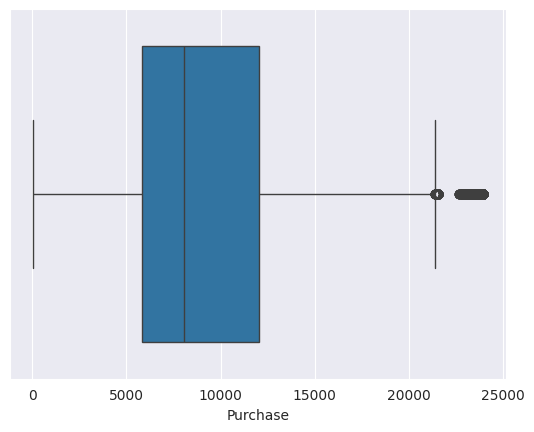

In [137]:
sns.boxplot(data=df,x='Purchase')
plt.show()

**Observation**:
1. As we see there are outliers in the 'Purchase' column.
2. All values greater than upper bound (21400.5) are outliers in 'Purchase' column

In [138]:
(len(df.loc[df['Purchase']>upper_bound])/len(df))*100

0.4866671029763593

**Analysis:**

Roughly 0.48% of the values in the 'Purchase' column exhibit outlier behavior. However, we have opted not to remove these outliers, as they could potentially yield valuable insights and prove useful for conducting sample analysis.

# Univariate analysis

## Distribution of gender among Walmart customers

In [139]:
# Create pie chart
colors=['#6279B8','#A0E8AF']
pie_chart = go.Figure(go.Pie(labels=df['Gender'].value_counts().index, values=df['Gender'].value_counts()))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
labels = df['Gender'].value_counts().index
bar_chart = go.Figure(go.Bar(x=labels, y=df['Gender'].value_counts(),
                              marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Gender among Walmart Customers",
                xaxis=dict(title='Gender',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of Customers',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()


**Insight**:
At Walmart, 75.3% of transactions are attributed to male customers, while 24.7% of transactions are attributed to female customers.

**Recommendations**:
1. For Black Friday sales, make sure the store provides a wide selection of products that align with the preferences and requirements of female customers. This might encompass a diverse range, spanning from clothing and beauty products to household essentials and beyond.
2. Actively seek feedback from female customers to understand their preferences, concerns, and suggestions. Use this feedback to make improvements and adjustments that cater to their needs.
3. For Black Friday sales, introduce loyalty programs tailored to female customers, featuring exclusive perks like discounts, early access to sales, and unique rewards. This approach can enhance engagement and attract female shoppers.
4. Enhance the online shopping experience for female customers. Ensure that the website is user-friendly, offers detailed product information, and provides convenient options for delivery and returns.
5. Collaborate with brands or influencers that resonate with female customers. This can help expand Walmart's reach and attract new female customers.


## Distribution of Martial-Status among Walmart customers

In [140]:
labels = df['Marital_Status'].value_counts().index
values = df['Marital_Status'].value_counts()

# Create pie chart
colors = [ "#ffd166","#ef476f"]
pie_chart = go.Figure(go.Pie(labels=labels, values=values))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=values,
                              marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Marital Status among Walmart Customers",
                xaxis=dict(title='Marital Status',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of Customers',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insight**:
Out of the total transactions, 59% are carried out by unmarried customers, while the remaining 41% are attributed to married customers.

**Recommendations**

1.  Craft special bundles of essential household items for Black Friday sales, presenting family-focused discounts. This initiative aims to deliver both convenience and cost savings for married customers and their families during this event.
2. Host parenting workshops and family-friendly events, while providing personalized deals on kids' products, demonstrating Walmart's commitment to supporting married customers' family needs.

## Distribution of Age-group across the Walmart customers

In [141]:
labels=df['Age'].value_counts().index
values=df['Age'].value_counts()

#create pie chart
# Create pie chart
colors = ["#2c699a", "#048ba8","#0db39e","#83e377","#b9e769","#efea5a","#f1c453"]

pie_chart = go.Figure(go.Pie(labels=labels, values=values))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=values, marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Marital Status among Walmart Customers",
                xaxis=dict(title='Age-group',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of Customers',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insight:**

Approximately 86.31% of transactions are attributed to the age group 26-50, while those aged above 50 account for 10.91%. The youngest group (0-17 years) constitutes 2.75% of the total transactions.

**Recommendations**:
1. Designate safe and fun play areas within the store where children can engage in age-appropriate activities. This can provide parents with a convenient shopping experience while keeping kids entertained.
2. Create dedicated zones with comfortable seating and Wi-Fi for teenagers. This can become a place where they can socialize, study, or relax while their parents shop.
3. Stock a wide range of products that appeal to kids and teenagers, including toys, clothes, books, electronics, and school supplies. Ensure that the products are both engaging and age-appropriate.
4. Offer educational toys, craft kits, and learning materials that promote creativity and skill development among children.
5.  Introduce special discounts and offers exclusively for the 0-17 age group, encouraging both children and parents to choose Walmart for their shopping needs.

## Distribution of Walmart customers across Product_Category,Occupation,City_Category,Stay_In_Current_City_Years

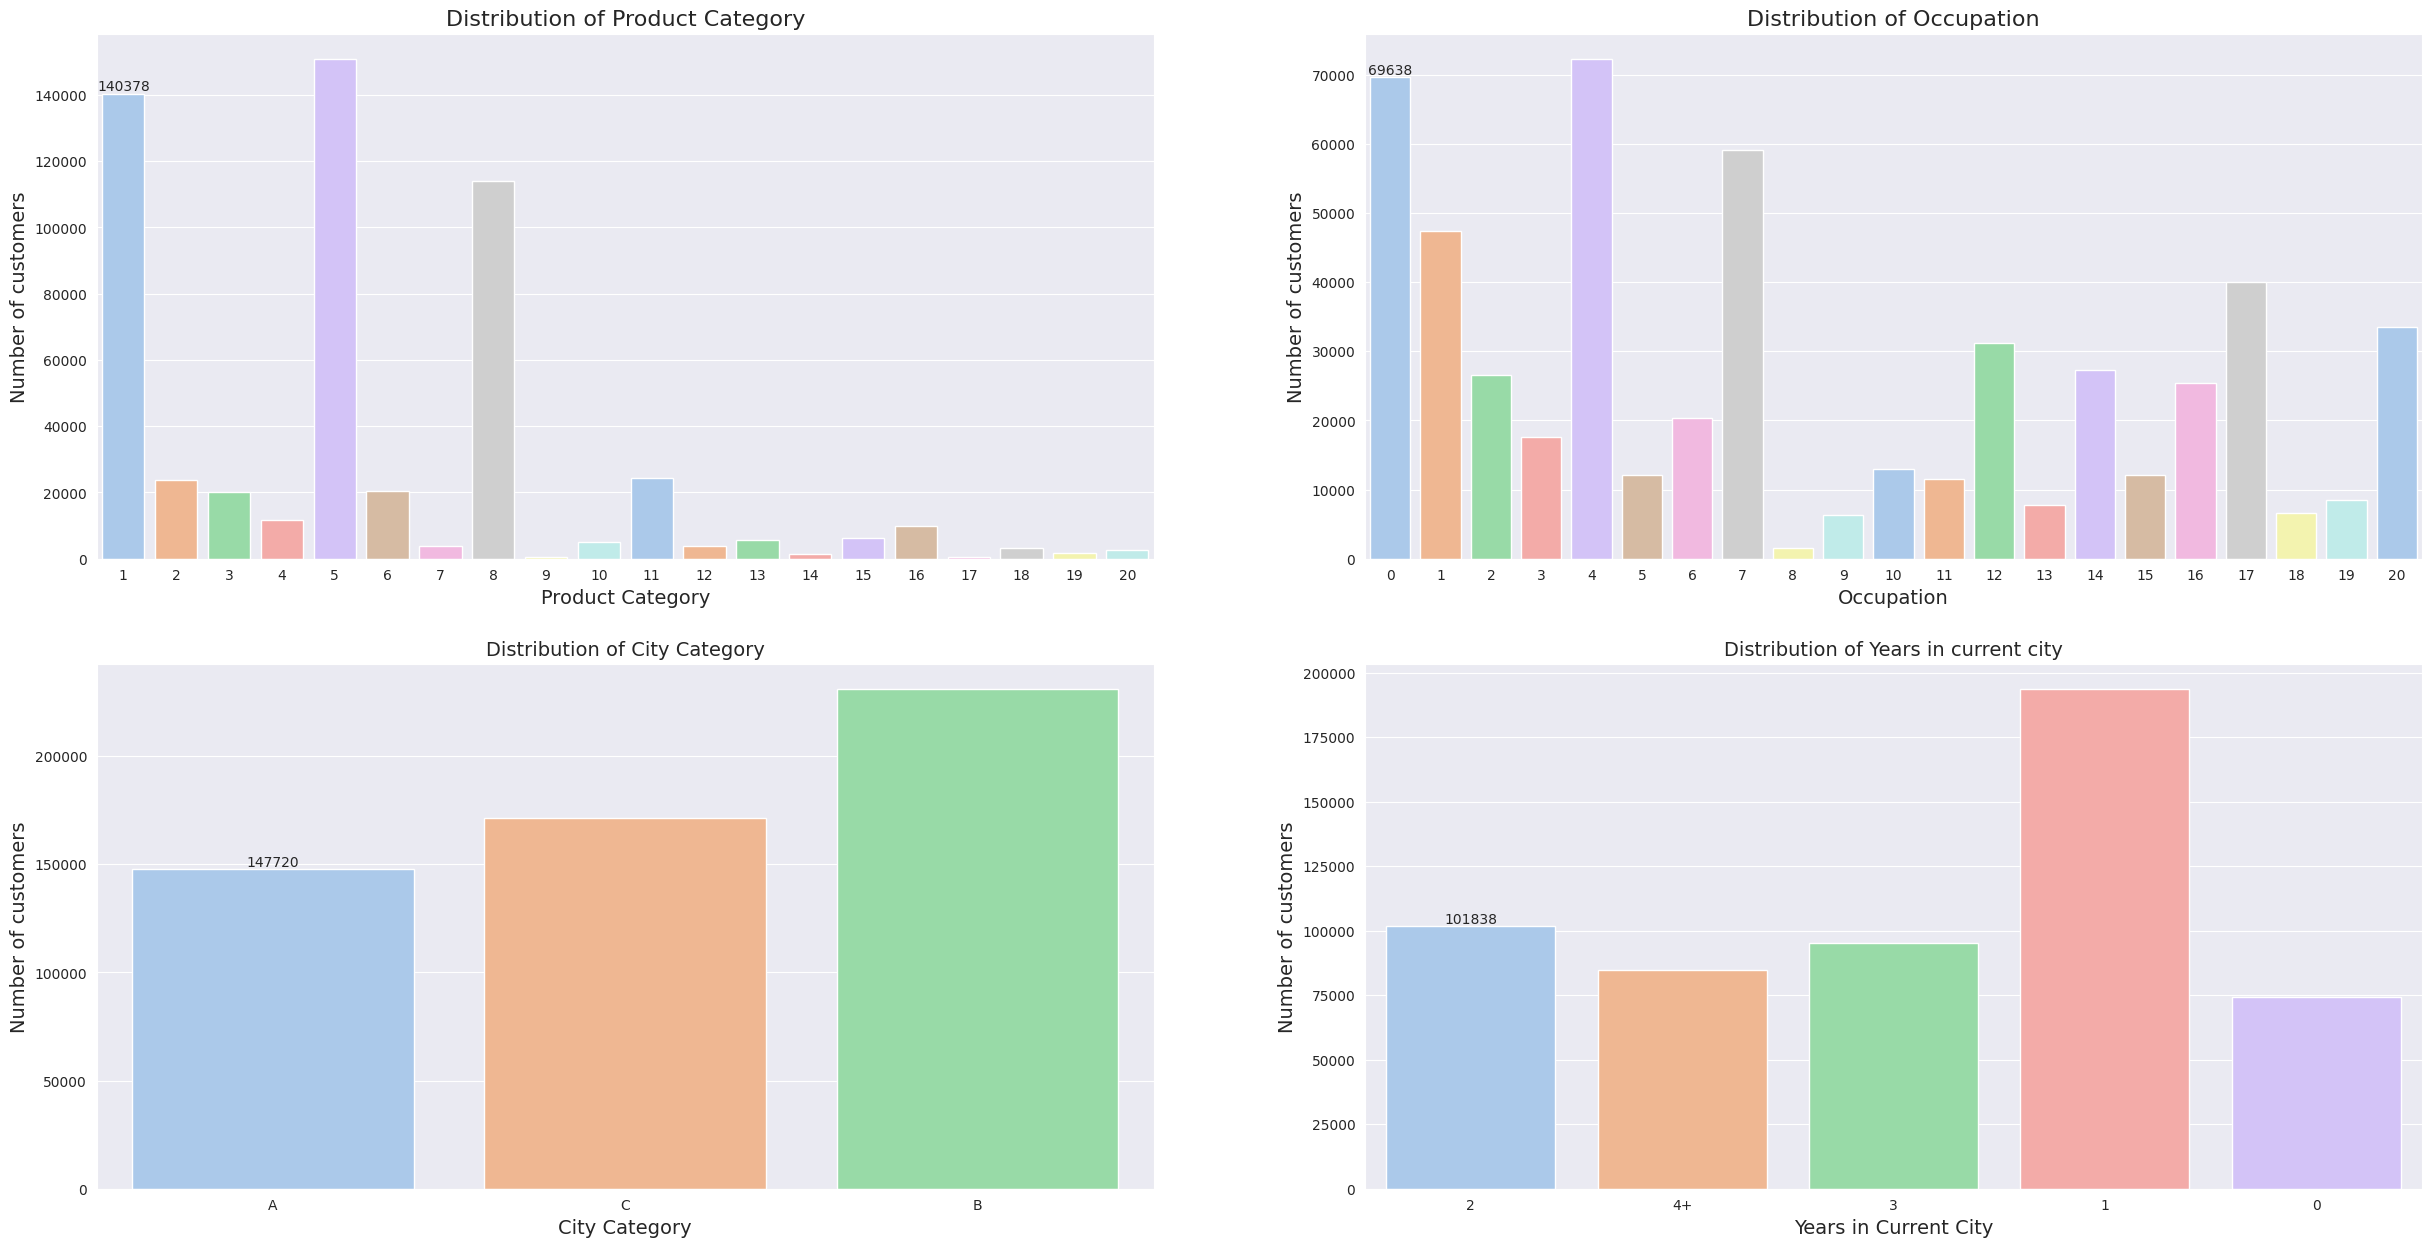

In [142]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(2,2,figsize=(30,15))

#count plot for product category
sns.countplot(data=df,x='Product_Category',palette='pastel',ax=ax[0,0])
ax[0,0].set_xlabel('Product Category',fontdict=dict(fontsize=14))
ax[0,0].set_ylabel('Number of customers',fontdict=dict(fontsize=14))
ax[0,0].bar_label(ax[0,0].containers[0])
ax[0,0].set_title('Distribution of Product Category',fontdict=dict(fontsize=16))

#count plot for Occupation
sns.countplot(data=df,x='Occupation',palette='pastel',ax=ax[0,1])
ax[0,1].set_xlabel('Occupation',fontdict=dict(fontsize=14))
ax[0,1].set_ylabel('Number of customers',fontdict=dict(fontsize=14))
ax[0,1].bar_label(ax[0,1].containers[0])
ax[0,1].set_title('Distribution of Occupation',fontdict=dict(fontsize=16))
fig.show()

#countplot for city category
sns.countplot(data=df,x='City_Category',palette='pastel',ax=ax[1,0])
ax[1,0].set_xlabel('City Category',fontdict=dict(fontsize=14))
ax[1,0].set_ylabel('Number of customers',fontdict=dict(fontsize=14))
ax[1,0].bar_label(ax[1,0].containers[0])
ax[1,0].set_title('Distribution of City Category',fontdict=dict(fontsize=14))
fig.show()

#countplot for years in current city
sns.countplot(data=df,x='Stay_In_Current_City_Years',palette='pastel',ax=ax[1,1])
ax[1,1].set_xlabel('Years in Current City',fontdict=dict(fontsize=14))
ax[1,1].set_ylabel('Number of customers',fontdict=dict(fontsize=14))
ax[1,1].bar_label(ax[1,1].containers[0])
ax[1,1].set_title('Distribution of Years in current city',fontdict=dict(fontsize=14))
fig.show()


**Insight**:

1. Among Walmart's customers, a notable 27.4% exhibit a preference for purchasing items within product category 5. On the other hand, product category 9 experiences the least popularity, with only a minimal 0.07% of customers expressing a preference for it.
2. The majority of customers fall under Occupation category 4.
3. Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.
4. The majority of customers reside in a single city for a duration of one year.


## Distribution of Purchase across Walmart Customers

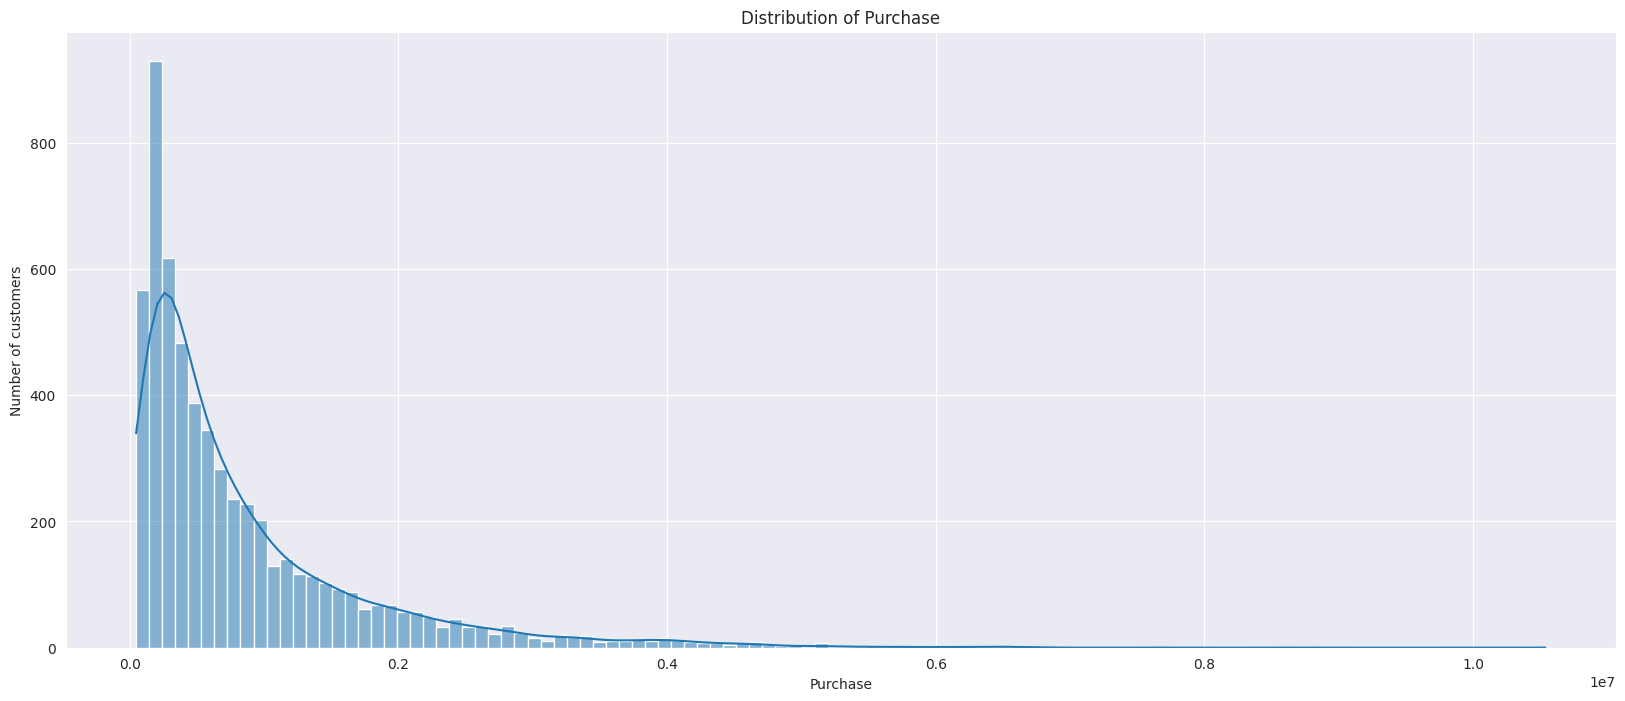

In [143]:
purchase_df=df.groupby(['User_ID']).agg(purchase_sum=('Purchase','sum')).reset_index()
plt.figure(figsize=(20,8))
sns.histplot(data=purchase_df,x='purchase_sum',kde=True)
plt.xlabel('Purchase')
plt.ylabel('Number of customers')
plt.title('Distribution of Purchase')
plt.show()

**Insight:**
Purchase distribution of customers exhibits positive skewness, with a pronounced tail extending towards the higher values on the right side.

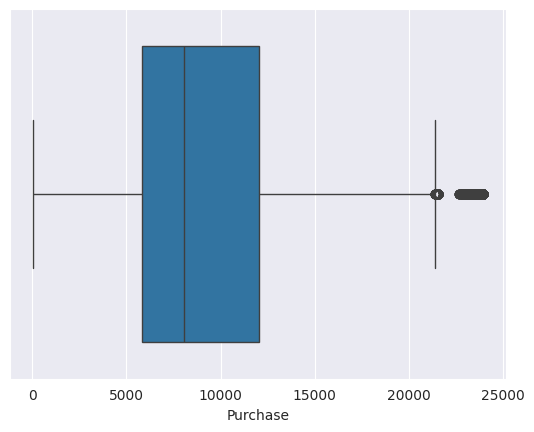

In [144]:
sns.boxplot(data=df,x='Purchase')
plt.show()

In [145]:
col='Purchase'
mean=df[col].mean().round(2)
standard_deviation=round(df[col].std(),2)
median=round(df[col].median(),2)
minimum=df[col].min()
maximum=df[col].max()
q1=np.percentile(df[col],25)
q3=np.percentile(df[col],75)
IQR=q3-q1
upper_bound=q3+1.5*IQR
lower_bound=q1-1.5*IQR
print(f'--- Descriptive Statistics of {col} column ---')
print(f'Mean : {mean}')
print(f'Standard Deviation : {standard_deviation}')
print(f'Median : {median}')
print(f'Minimum : {minimum}')
print(f'Maximum : {maximum}')
print(f'25th Percentile : {q1}')
print(f'75th Percentile : {q3}')
print(f'Inter Quartile Range : {IQR}')
print(f'Upper bound:{upper_bound}')
print(f'Lower bound: {lower_bound}')
print()

--- Descriptive Statistics of Purchase column ---
Mean : 9263.97
Standard Deviation : 5023.07
Median : 8047.0
Minimum : 12
Maximum : 23961
25th Percentile : 5823.0
75th Percentile : 12054.0
Inter Quartile Range : 6231.0
Upper bound:21400.5
Lower bound: -3523.5



# Bivariate Analysis

## Distribution of Purchase across Gender

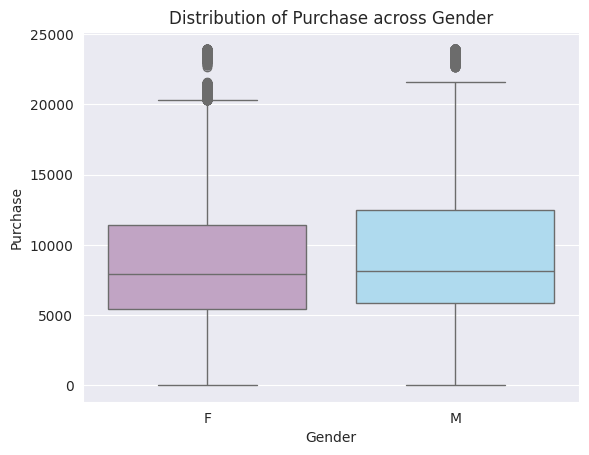

In [146]:
sns.boxplot(data=df,x='Gender',y='Purchase',palette=["#C59FC9","#A4DEF9"])
plt.title("Distribution of Purchase across Gender")
plt.show()

In [147]:
q1_male=np.percentile(df[df['Gender']=='M']['Purchase'],25)
q3_male=np.percentile(df[df['Gender']=='M']['Purchase'],75)
median_male=np.percentile(df[df['Gender']=='M']['Purchase'],50)
q1_female=np.percentile(df[df['Gender']=='F']['Purchase'],25)
q3_female=np.percentile(df[df['Gender']=='F']['Purchase'],75)
median_female=np.percentile(df[df['Gender']=='F']['Purchase'],50)
print(f'Inter Quartile Range for male customers :{q1_male}-{q3_male}')
print(f'Median purchases for male customers: {median_male}')
print(f'Inter Quartile Range for female customer:{q1_female}-{q3_female}')
print(f'Median purchases for female customers: {median_female}')

Inter Quartile Range for male customers :5863.0-12454.0
Median purchases for male customers: 8098.0
Inter Quartile Range for female customer:5433.0-11400.0
Median purchases for female customers: 7914.0


**Insights**:
1. Male customers spend more money per transaction than female customers.
2. Inter Quartile Range for male customers :5863.0-12454.0
3. Median purchases for male customers: 8098.0
4. Inter Quartile Range for female customer:5433.0-11400.0
4. Median purchases for female customers: 7914.0


## Distribution of Purchase across Martial Status

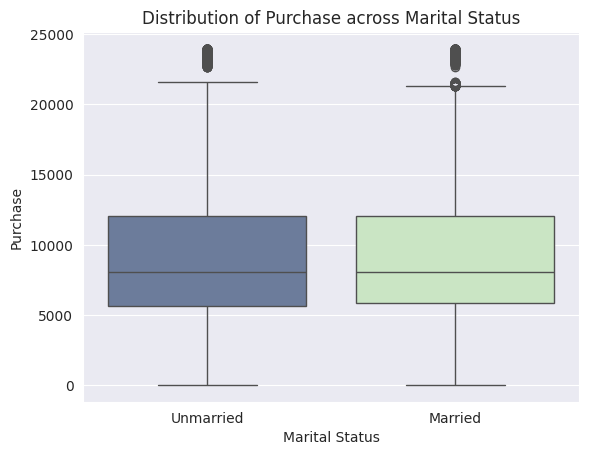

In [148]:
sns.boxplot(data=df,x='Marital_Status',y='Purchase',palette=["#647AA3","#C6EBBE"])
plt.title("Distribution of Purchase across Marital Status")
plt.xlabel('Marital Status')
plt.show()

In [149]:
q1_married=np.percentile(df[df['Marital_Status']=='Married']['Purchase'],25)
q3_married=np.percentile(df[df['Marital_Status']=='Married']['Purchase'],75)
median_married=np.percentile(df[df['Marital_Status']=='Married']['Purchase'],50)
q1_unmarried=np.percentile(df[df['Marital_Status']=='Unmarried']['Purchase'],25)
q3_unmarried=np.percentile(df[df['Marital_Status']=='Unmarried']['Purchase'],75)
median_unmarried=np.percentile(df[df['Marital_Status']=='Unmarried']['Purchase'],50)
print(f'Inter Quartile Range for married customers :{q1_married}-{q3_married}')
print(f'Median purchases for married customers: {median_married}')
print(f'Inter Quartile unmarried for unmarried customer:{q1_unmarried}-{q3_unmarried}')
print(f'Median purchases for unmarried customers: {median_unmarried}')

Inter Quartile Range for married customers :5843.0-12042.0
Median purchases for married customers: 8051.0
Inter Quartile unmarried for unmarried customer:5605.0-12061.0
Median purchases for unmarried customers: 8044.0


**Insight**:

The spending behavior of both married and unmarried customers is consistent, as they both spend nearly the same amount per transaction. This is notably evident from the boxplot analysis, where the interquartile range and median purchases for both groups remain identical.

## Distribution of Purchase across Age

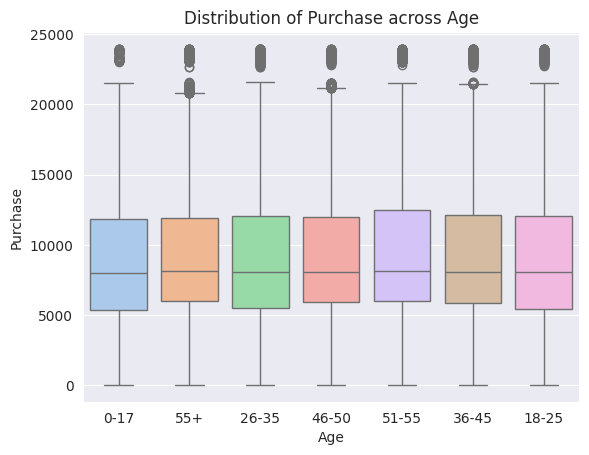

In [150]:
sns.boxplot(data=df,x='Age',y='Purchase',palette='pastel')
plt.title("Distribution of Purchase across Age")
plt.xlabel('Age')
plt.show()

**Insight**:
Across each age group, customers exhibit a comparable spending pattern per transaction. The spending behavior remains remarkably consistent within each age category.

## Distribution of Purchase across Product_Category,Occupation,City_Category,Stay_In_Current_City_Years

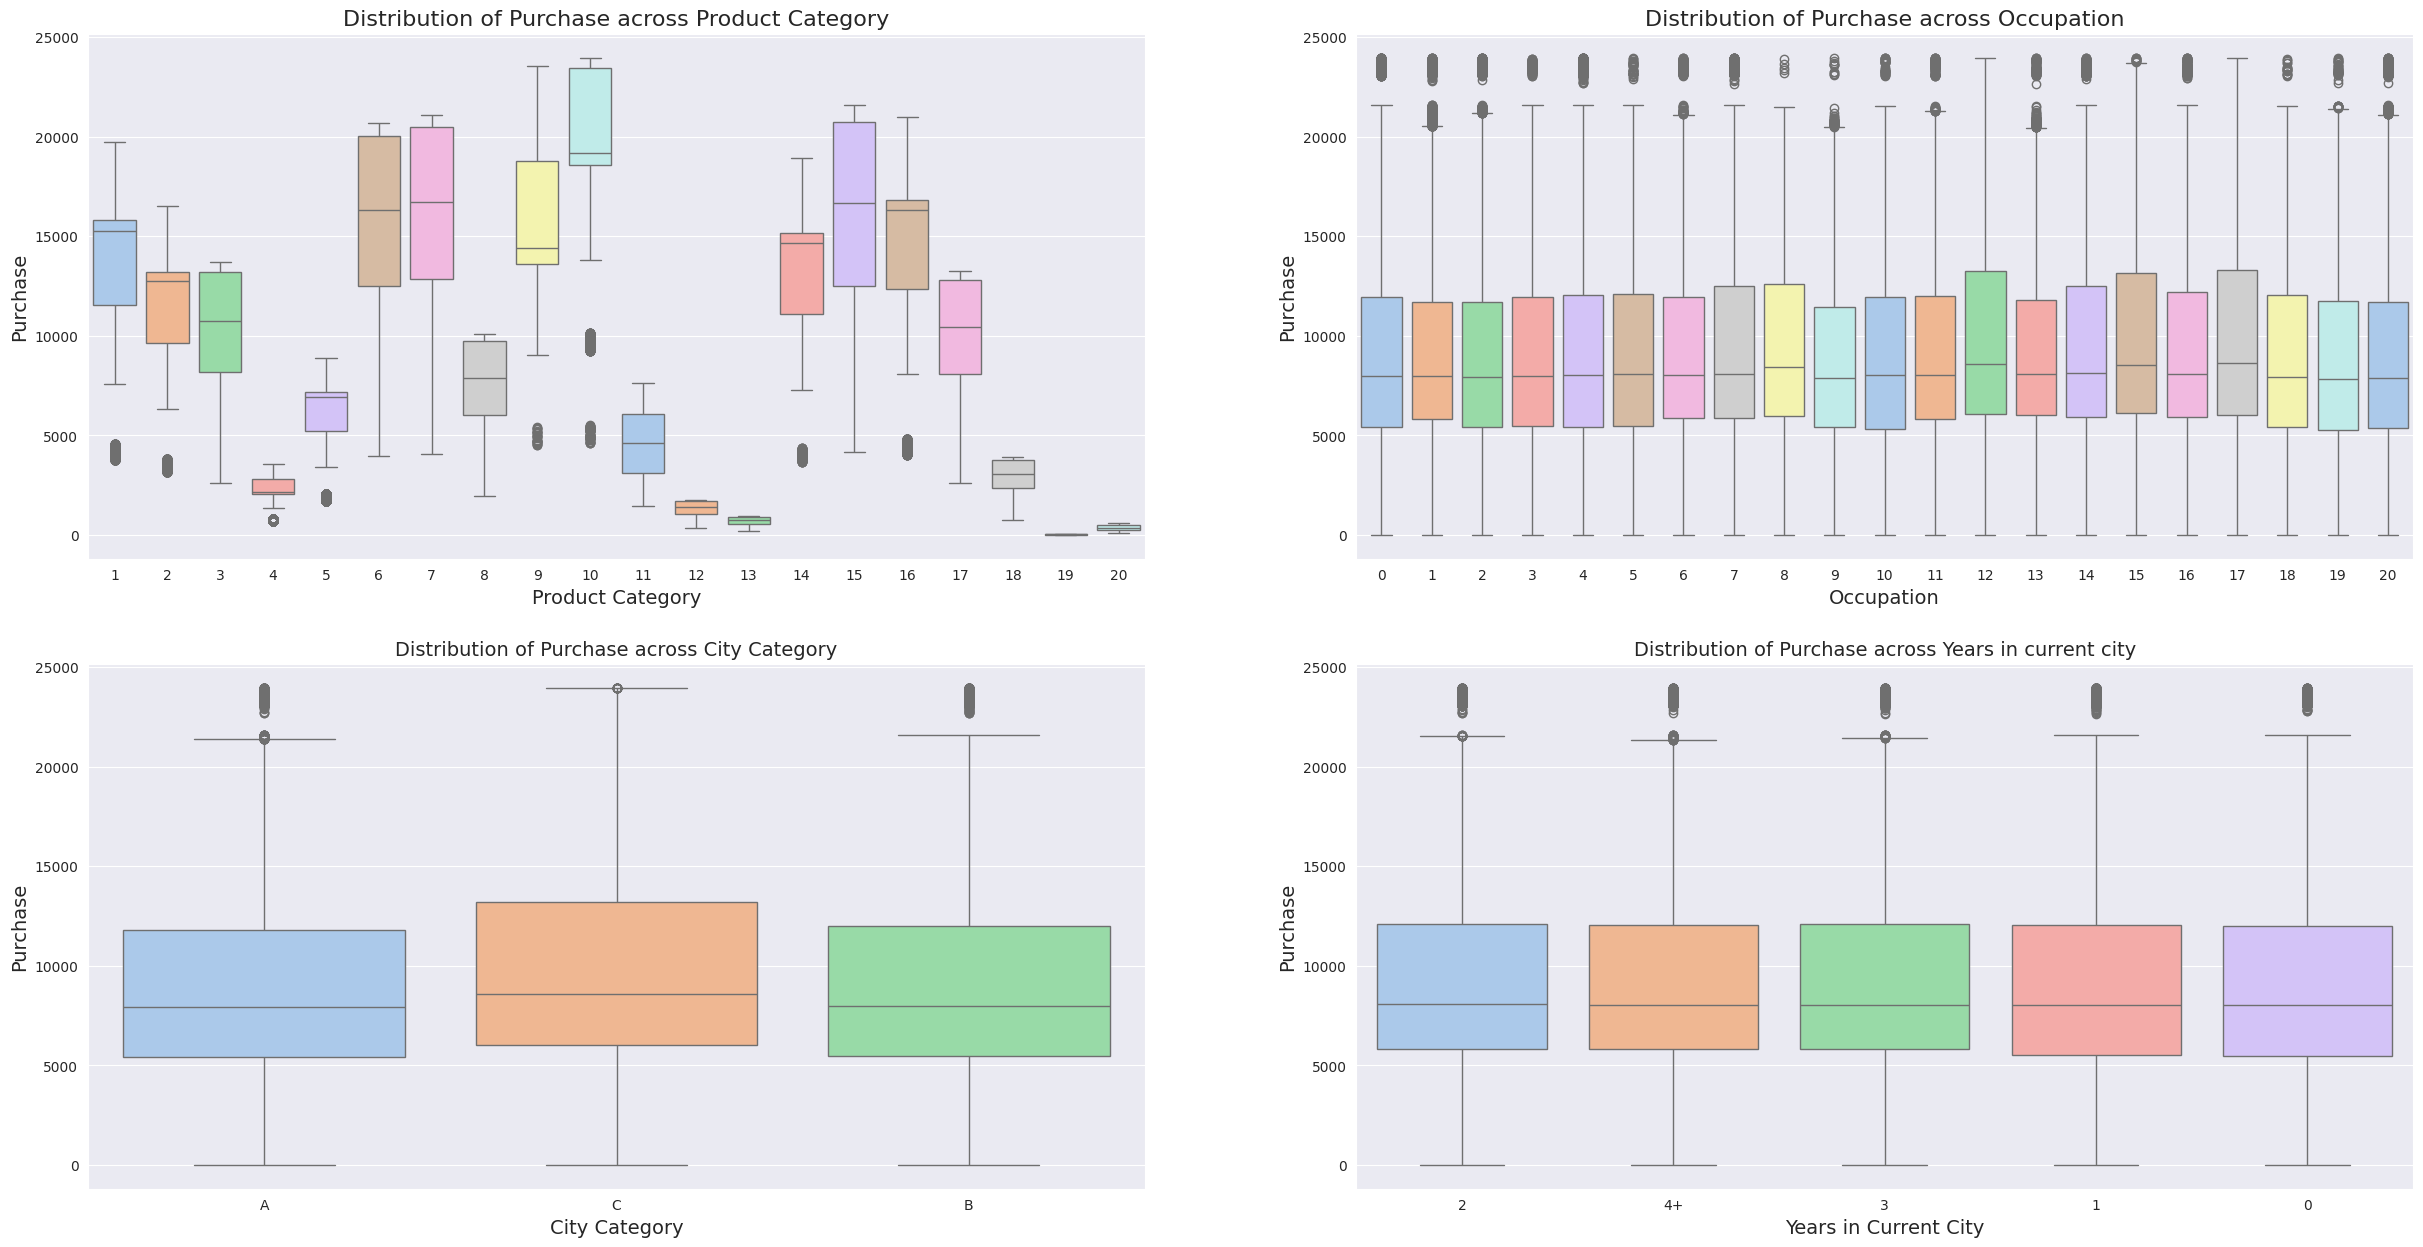

In [151]:
sns.set_style('darkgrid')
fig,ax=plt.subplots(2,2,figsize=(30,15))

#Box plot for product category
sns.boxplot(data=df,x='Product_Category',y='Purchase',palette='pastel',ax=ax[0,0])
ax[0,0].set_xlabel('Product Category',fontdict=dict(fontsize=14))
ax[0,0].set_ylabel('Purchase',fontdict=dict(fontsize=14))
ax[0,0].set_title('Distribution of Purchase across Product Category',fontdict=dict(fontsize=16))
fig.show()

#Box plot for Occupation
sns.boxplot(data=df,x='Occupation',y='Purchase',palette='pastel',ax=ax[0,1])
ax[0,1].set_xlabel('Occupation',fontdict=dict(fontsize=14))
ax[0,1].set_ylabel('Purchase',fontdict=dict(fontsize=14))
ax[0,1].set_title('Distribution of Purchase across Occupation',fontdict=dict(fontsize=16))
fig.show()

#Boxplot for city category
sns.boxplot(data=df,x='City_Category',y='Purchase',palette='pastel',ax=ax[1,0])
ax[1,0].set_xlabel('City Category',fontdict=dict(fontsize=14))
ax[1,0].set_ylabel('Purchase',fontdict=dict(fontsize=14))
ax[1,0].set_title('Distribution of Purchase across City Category',fontdict=dict(fontsize=14))
fig.show()

#Boxplot for years in current city
sns.boxplot(data=df,x='Stay_In_Current_City_Years',y='Purchase',palette='pastel',ax=ax[1,1])
ax[1,1].set_xlabel('Years in Current City',fontdict=dict(fontsize=14))
ax[1,1].set_ylabel('Purchase',fontdict=dict(fontsize=14))
ax[1,1].set_title('Distribution of Purchase across Years in current city',fontdict=dict(fontsize=14))
fig.show()

**Insight**:
1. Within Walmart, product categories 13, 19, and 20 record the lowest spending per transaction among customers.
2. Among Walmart customers, product categories 6, 7, and 15 stand out as the most favored, evidenced by their higher spending per transaction.
3. Customers residing in a 'C' city category demonstrate higher spending per transaction compared to customers in other city categories.

## Distribution of top 3 product category across Gender and Marital Status

In [152]:
top3_product_category=df['Product_Category'].value_counts().index[:3]
top3_df= df[df['Product_Category'].isin(top3_product_category)]


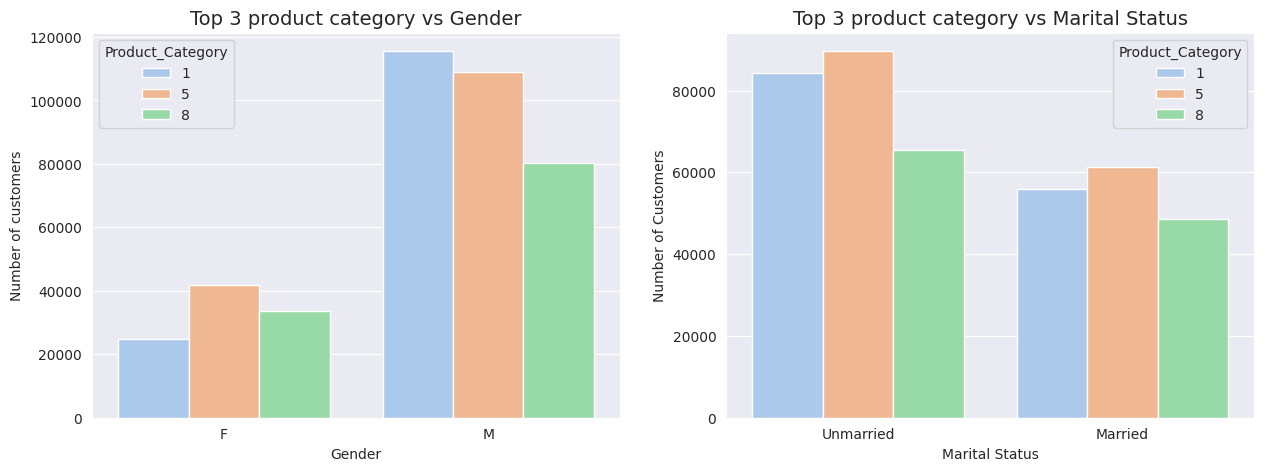

In [153]:
# Countplot for top 3 product category vs Gender
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=top3_df,x='Gender',hue='Product_Category',palette='pastel')
plt.title('Top 3 product category vs Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of customers')

#Countplot for top 3 product category vs Martial Status
plt.subplot(1,2,2)
sns.countplot(data=top3_df,x='Marital_Status',hue='Product_Category',palette='pastel')
plt.title('Top 3 product category vs Marital Status', fontsize=14)
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')

plt.show()

**Insight**:

1.  Female customers predominantly favor product category 5 for their purchases, while male customers show a preference for product category 1 in their shopping choices.
2. Both unmarried and married customers at Walmart exhibit a shared preference for product category 5 when making their shopping choices.

## Heatmap and Correlation

In [154]:
num_cols=df_copy.select_dtypes(include=['number','float']).columns
num_cols

Index(['User_ID', 'Occupation', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

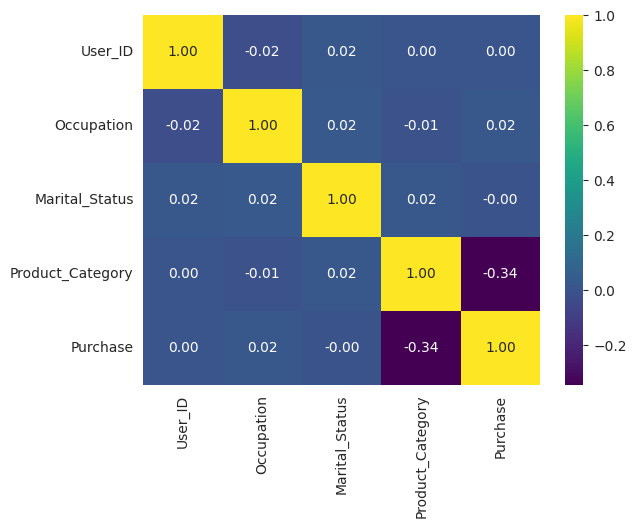

In [155]:
sns.heatmap(df_copy[num_cols].corr(),annot=True,cmap='viridis',fmt='.2f')
plt.show()

# Sample Analysis Using Central Limit Theorem and Confidence Interval

## CLT and CI analysis for Gender

### CLT and CI analysis for Male customers

**Creating a Samples of size 1000 and computing means through bootstraping**

In [156]:
male_df=df.loc[df['Gender']=='M']['Purchase']
male_df.mean()

9437.526040472265

In [157]:
male_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(male_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    male_purchase_mean_1000.append(bootstraped_mean)

**Calculating CI at 90%,95% and 99% for sample of size 1000**

In [158]:
CI_male_90_1000=np.percentile(male_purchase_mean_1000,[5,95])
CI_male_95_1000=np.percentile(male_purchase_mean_1000,[2.5,97.5])
CI_male_99_1000=np.percentile(male_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_male_90_1000[0],2)} - {np.round(CI_male_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_male_99_1000[0],2)} - {np.round(CI_male_99_1000[1],2)}')

CI at 90% for sample of size 1000: 9178.37 - 9703.51
CI at 95% for sample of size 1000: 9130.57 - 9753.48
CI at 99% for sample of size 1000: 9035.05 - 9864.42


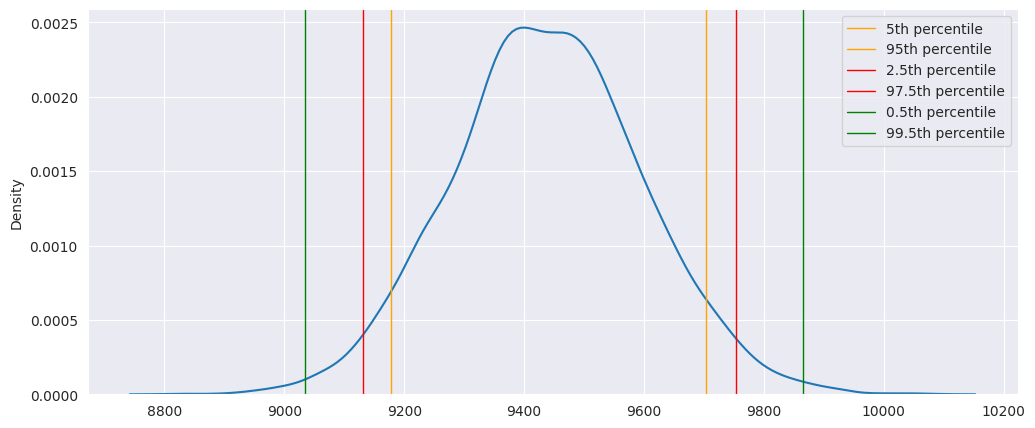

In [159]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(male_purchase_mean_1000)
plt.axvline(x=np.percentile(male_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(male_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

**Repeating the analysis for sample of size 2500 and 5000**

In [160]:
# Bootstraping means for sample of size 2500
male_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(male_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    male_purchase_mean_2500.append(bootstraped_mean)

# Bootstraping means for sample of size 5000
male_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(male_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    male_purchase_mean_5000.append(bootstraped_mean)


In [161]:
CI_male_90_2500=np.percentile(male_purchase_mean_2500,[5,95])
CI_male_95_2500=np.percentile(male_purchase_mean_2500,[2.5,97.5])
CI_male_99_2500=np.percentile(male_purchase_mean_2500,[0.5,99.5])
CI_male_90_5000=np.percentile(male_purchase_mean_5000,[5,95])
CI_male_95_5000=np.percentile(male_purchase_mean_5000,[2.5,97.5])
CI_male_99_5000=np.percentile(male_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_male_90_2500[0],2)} - {np.round(CI_male_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_male_99_2500[0],2)} - {np.round(CI_male_99_2500[1],2)}')
print(f'CI at 90% for sample of size 5000: {np.round(CI_male_90_5000[0],2)} - {np.round(CI_male_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_male_99_5000[0],2)} - {np.round(CI_male_99_5000[1],2)}')

CI at 90% for sample of size 2500: 9271.36 - 9602.71
CI at 95% for sample of size 2500: 9239.28 - 9636.57
CI at 99% for sample of size 2500: 9182.65 - 9694.22
CI at 90% for sample of size 5000: 9320.16 - 9555.35
CI at 95% for sample of size 5000: 9300.34 - 9578.58
CI at 99% for sample of size 5000: 9246.24 - 9626.1


**Visualising bootstraped means through histogram in order to check that it follows normal distribution**

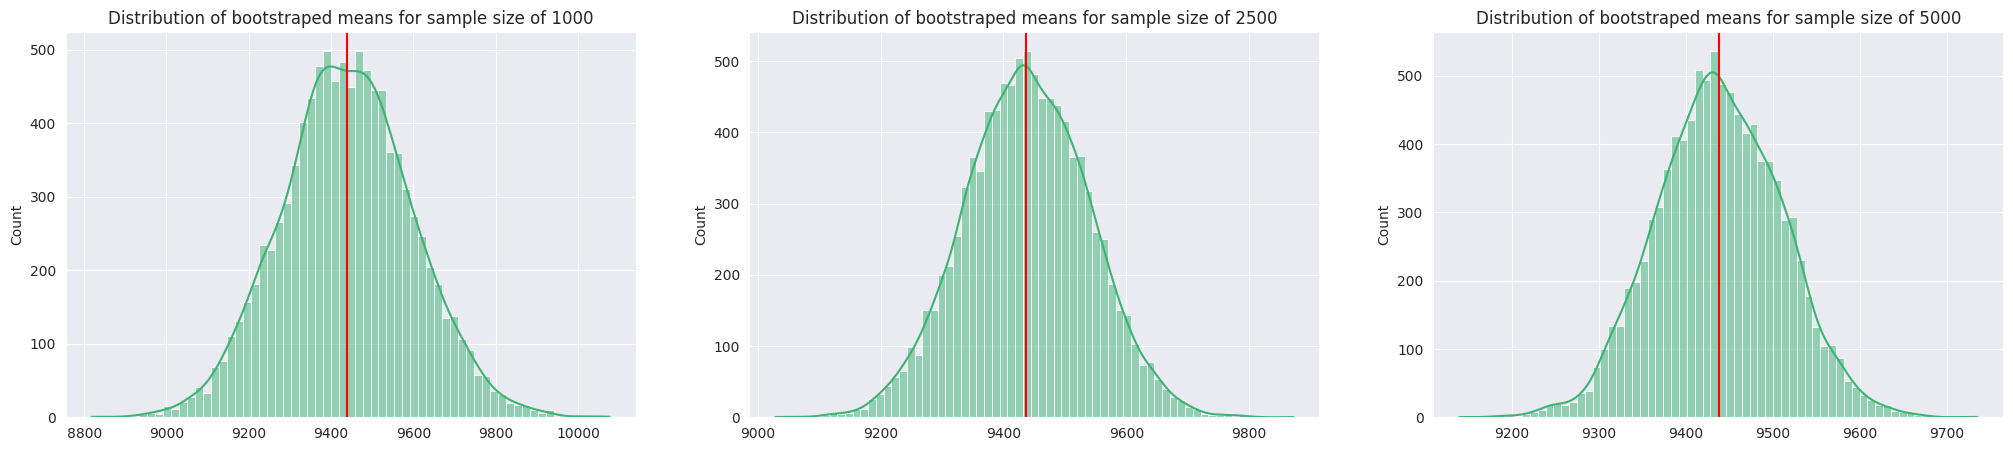

In [162]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(male_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(male_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(male_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(male_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(male_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(male_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

**Inference**:

1. In accordance with the Central Limit Theorem, the distribution of sample means tends to become normal, even when the population distribution does not exhibit normality. This phenomenon is clearly evident in this scenario, as the distribution of bootstrapped means conforms to a normal distribution, despite the population mean not adhering to such a distribution.
2. As the sample size increases, the distribution of sample means becomes closer to a normal distribution.

**Calculating the standard error for sample sizes of 1000, 2500, and 5000.**

In [163]:
# Standard error using formulla --->(population standard deviation/sqrt(sample size))

SE_male_1000 = (male_df.std()/np.sqrt(1000))
SE_male_2500 = (male_df.std()/np.sqrt(2500))
SE_male_5000 = (male_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_male_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_male_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_male_5000,2)}')

Standard error for sample size of 1000: 161.03
Standard error for sample size of 2500: 101.84
Standard error for sample size of 5000: 72.01


In [164]:
# Standard error using bootstraping
print(f'Standard error for sample size of 1000: {np.round(pd.Series(male_purchase_mean_1000).std(),2)}')
print(f'Standard error for sample size of 2500: {np.round(pd.Series(male_purchase_mean_2500).std(),2)}')
print(f'Standard error for sample size of 5000: {np.round(pd.Series(male_purchase_mean_5000).std(),2)}')


Standard error for sample size of 1000: 159.15
Standard error for sample size of 2500: 101.01
Standard error for sample size of 5000: 71.95


**Visualising all analysis using a table**

In [165]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_male_1000,SE_male_2500,SE_male_5000],
            'CI_90':[f'{np.round(CI_male_90_1000[0],2)} - {np.round(CI_male_90_1000[1],2)}',
                     f'{np.round(CI_male_90_2500[0],2)} - {np.round(CI_male_90_2500[1],2)}',
                     f'{np.round(CI_male_90_5000[0],2)} - {np.round(CI_male_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}',
                     f'{np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}',
                     f'{np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_male_99_1000[0],2)} - {np.round(CI_male_99_1000[1],2)}',
                     f'{np.round(CI_male_99_2500[0],2)} - {np.round(CI_male_99_2500[1],2)}',
                     f'{np.round(CI_male_99_5000[0],2)} - {np.round(CI_male_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,161.029067,9178.37 - 9703.51,9130.57 - 9753.48,9035.05 - 9864.42
1,2500,101.843724,9271.36 - 9602.71,9239.28 - 9636.57,9182.65 - 9694.22
2,5000,72.014388,9320.16 - 9555.35,9300.34 - 9578.58,9246.24 - 9626.1


**Inference**:

1. As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.
2. The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.

### CLT and CI analysis for Female customers

**Creating a Samples of size 1000 and computing means through bootstraping**

In [166]:
female_df=df.loc[df['Gender']=='F']['Purchase']
female_df.mean()

8734.565765155476

In [167]:
female_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_1000.append(bootstraped_mean)

**Calculating CI at 90%,95% and 99% for sample of size 1000**

In [168]:
CI_female_90_1000=np.percentile(female_purchase_mean_1000,[5,95])
CI_female_95_1000=np.percentile(female_purchase_mean_1000,[2.5,97.5])
CI_female_99_1000=np.percentile(female_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_female_90_1000[0],2)} - {np.round(CI_female_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_female_99_1000[0],2)} - {np.round(CI_female_99_1000[1],2)}')

CI at 90% for sample of size 1000: 8494.34 - 8983.27
CI at 95% for sample of size 1000: 8445.33 - 9029.91
CI at 99% for sample of size 1000: 8358.1 - 9132.07


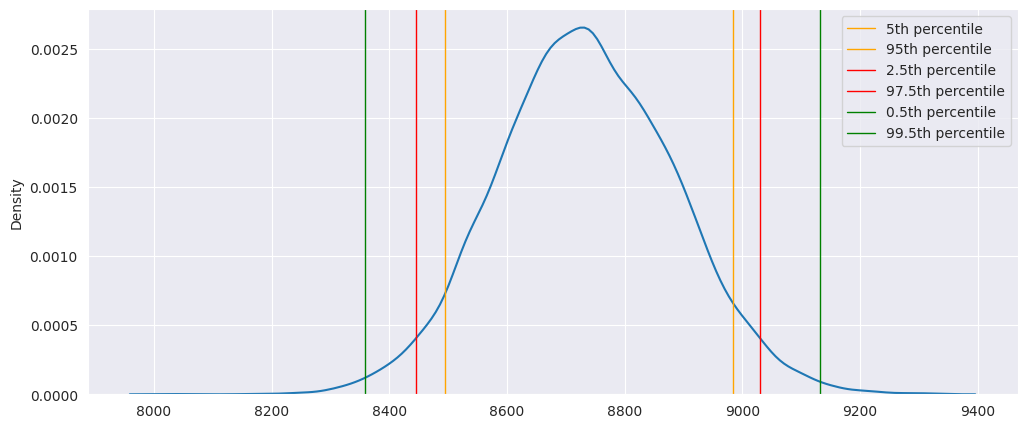

In [169]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(female_purchase_mean_1000)
plt.axvline(x=np.percentile(female_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(female_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

**Repeating the analysis for sample of sizes 2500 and 5000**

In [170]:
# Bootstraping means for sample of size 2500
female_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_2500.append(bootstraped_mean)

# Bootstraping means for sample of size 5000
female_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(female_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    female_purchase_mean_5000.append(bootstraped_mean)

In [171]:
CI_female_90_2500=np.percentile(female_purchase_mean_2500,[5,95])
CI_female_95_2500=np.percentile(female_purchase_mean_2500,[2.5,97.5])
CI_female_99_2500=np.percentile(female_purchase_mean_2500,[0.5,99.5])
CI_female_90_5000=np.percentile(female_purchase_mean_5000,[5,95])
CI_female_95_5000=np.percentile(female_purchase_mean_5000,[2.5,97.5])
CI_female_99_5000=np.percentile(female_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_female_90_2500[0],2)} - {np.round(CI_female_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_female_99_2500[0],2)} - {np.round(CI_female_99_2500[1],2)}')
print(f'CI at 90% for sample of size 5000: {np.round(CI_female_90_5000[0],2)} - {np.round(CI_female_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_female_99_5000[0],2)} - {np.round(CI_female_99_5000[1],2)}')

CI at 90% for sample of size 2500: 8579.17 - 8890.41
CI at 95% for sample of size 2500: 8549.33 - 8917.11
CI at 99% for sample of size 2500: 8492.62 - 8983.07
CI at 90% for sample of size 5000: 8623.69 - 8845.35
CI at 95% for sample of size 5000: 8603.17 - 8865.0
CI at 99% for sample of size 5000: 8556.88 - 8908.97


**Visualising bootstraped means through histogram in order to check that it follows normal distribution**

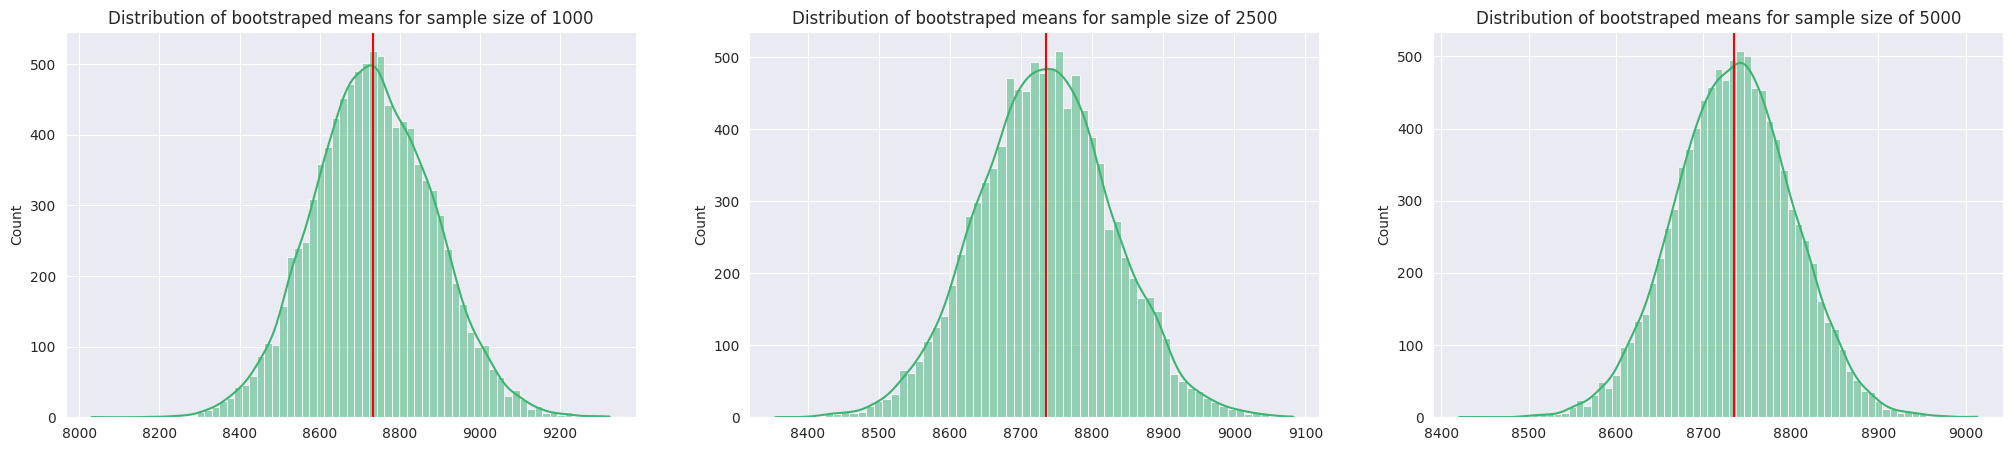

In [172]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(female_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(female_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(female_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(female_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()


**Inference**:

1. In accordance with the Central Limit Theorem, the distribution of sample means tends to become normal, even when the population distribution does not exhibit normality. This phenomenon is clearly evident in this scenario, as the distribution of bootstrapped means conforms to a normal distribution, despite the population mean not adhering to such a distribution.
2. As the sample size increases, the distribution of sample means becomes closer to a normal distribution.

**Calculating the standard error for sample sizes of 1000, 2500, and 5000.**

In [173]:
SE_female_1000 = (female_df.std()/np.sqrt(1000))
SE_female_2500 = (female_df.std()/np.sqrt(2500))
SE_female_5000 = (female_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_female_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_female_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_female_5000,2)}')

Standard error for sample size of 1000: 150.75
Standard error for sample size of 2500: 95.34
Standard error for sample size of 5000: 67.42


**Visualising all analysis using a table**

In [174]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_female_1000,SE_female_2500,SE_female_5000],
            'CI_90':[f'{np.round(CI_female_90_1000[0],2)} - {np.round(CI_female_90_1000[1],2)}',
                     f'{np.round(CI_female_90_2500[0],2)} - {np.round(CI_female_90_2500[1],2)}',
                     f'{np.round(CI_female_90_5000[0],2)} - {np.round(CI_female_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}',
                     f'{np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}',
                     f'{np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_female_99_1000[0],2)} - {np.round(CI_female_99_1000[1],2)}',
                     f'{np.round(CI_female_99_2500[0],2)} - {np.round(CI_female_99_2500[1],2)}',
                     f'{np.round(CI_female_99_5000[0],2)} - {np.round(CI_female_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,150.753153,8494.34 - 8983.27,8445.33 - 9029.91,8358.1 - 9132.07
1,2500,95.344666,8579.17 - 8890.41,8549.33 - 8917.11,8492.62 - 8983.07
2,5000,67.418860,8623.69 - 8845.35,8603.17 - 8865.0,8556.88 - 8908.97


**Inference**:

1. As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.
2. The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.

### Conclusion

**Comparing CI at 95% for female and male customers for sample sizes of 1000,2500 and 5000**

In [175]:
pd.DataFrame({'Sample Size':[1000,2500,5000],

             'CI_95_male':[f'{np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}',
                     f'{np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}',
                     f'{np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}'],
             'CI_95_female':[f'{np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}',
                     f'{np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}',
                     f'{np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}']})

,Sample Size,CI_95_male,CI_95_female
0,1000,9130.57 - 9753.48,8445.33 - 9029.91
1,2500,9239.28 - 9636.57,8549.33 - 8917.11
2,5000,9300.34 - 9578.58,8603.17 - 8865.0


**Inference:**

With a 95% confidence level, the confidence interval for male customers is consistently both higher and wider than the confidence interval for female customers across all provided sample sizes(1000,2500,5000). This suggests a statistically supported conclusion that male customers spend more money per transaction than female customers.

**Comparing CI for male and Female customers at 95% using KDE plot**

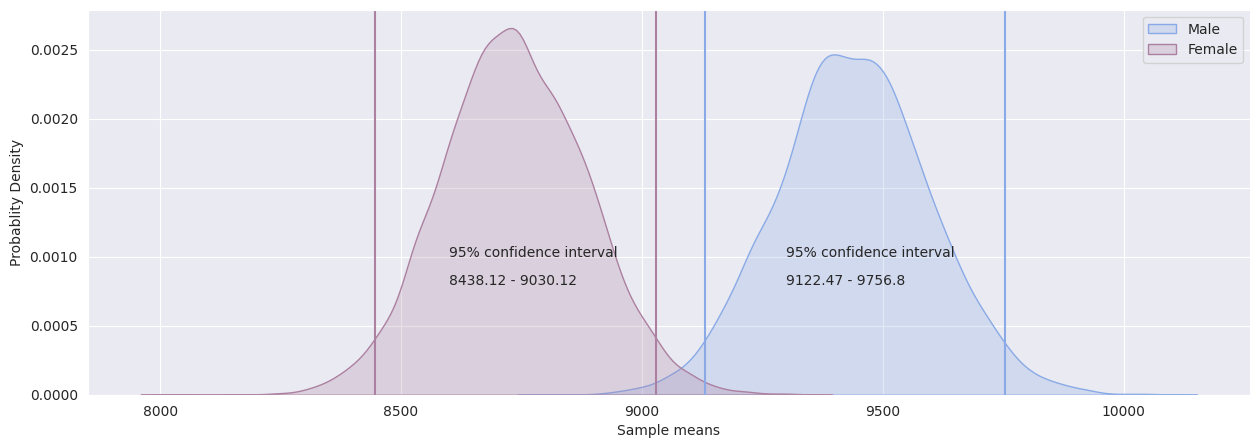

In [176]:
plt.figure(figsize=(15,5))

sns.kdeplot(male_purchase_mean_1000,color='#89AAE6',fill=True,label='Male')
sns.kdeplot(female_purchase_mean_1000,color='#AC80A0',fill=True,label='Female')
plt.axvline(np.percentile(male_purchase_mean_1000,[2.5]),0,1,color='#89AAE6')
plt.axvline(np.percentile(male_purchase_mean_1000,[97.5]),0,1,color='#89AAE6')
plt.axvline(np.percentile(female_purchase_mean_1000,[2.5]),0,1,color='#AC80A0')
plt.axvline(np.percentile(female_purchase_mean_1000,[97.5]),0,1,color='#AC80A0')
plt.annotate('95% confidence interval',xy=(9300,0.0010),size=10)
plt.annotate('9122.47 - 9756.8',xy=(9300,0.0008),size=10)
plt.annotate('95% confidence interval',xy=(8600,0.0010),size=10)
plt.annotate('8438.12 - 9030.12',xy=(8600,0.0008),size=10)
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

**Inference**
1. Confidence intervals at 95 % for male and female customers does not overlap.
2. With a 95% confidence level, the confidence interval for male customers is consistently both higher and wider than the confidence interval for female customers for a sample size of 1000. This statistically indicates that male customers tend to spend more money per transaction than female customers.

### Answers to the Question

**Q1. Are women spending more money per transaction than men? Why or Why not?**

1. No, CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 75.3% purchases are from male and only 24.7% purchases are from female).
2. The confidence interval for male purchases is consistently both higher and wider than the confidence interval for female purchases. This statistically indicates that male customers tend to spend more money per transaction than female customers.

**Q2.Confidence intervals and distribution of the mean of the expenses by female and male customers**

In [177]:
pd.DataFrame({'Sample Size':[1000,2500,5000],

             'CI_95_male':[f'{np.round(CI_male_95_1000[0],2)} - {np.round(CI_male_95_1000[1],2)}',
                     f'{np.round(CI_male_95_2500[0],2)} - {np.round(CI_male_95_2500[1],2)}',
                     f'{np.round(CI_male_95_5000[0],2)} - {np.round(CI_male_95_5000[1],2)}'],
             'CI_95_female':[f'{np.round(CI_female_95_1000[0],2)} - {np.round(CI_female_95_1000[1],2)}',
                     f'{np.round(CI_female_95_2500[0],2)} - {np.round(CI_female_95_2500[1],2)}',
                     f'{np.round(CI_female_95_5000[0],2)} - {np.round(CI_female_95_5000[1],2)}']})

,Sample Size,CI_95_male,CI_95_female
0,1000,9130.57 - 9753.48,8445.33 - 9029.91
1,2500,9239.28 - 9636.57,8549.33 - 8917.11
2,5000,9300.34 - 9578.58,8603.17 - 8865.0


## CI and CLT analysis for Marital Status

### CI and CLT analysis for Married Customers

**Creating a Samples of size 1000 and computing means through bootstraping**

In [178]:
married_df=df.loc[df['Marital_Status']=='Married']['Purchase']
married_df.mean()

9261.174574082374

In [179]:
married_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(married_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    married_purchase_mean_1000.append(bootstraped_mean)

In [180]:
CI_married_90_1000=np.percentile(married_purchase_mean_1000,[5,95])
CI_married_95_1000=np.percentile(married_purchase_mean_1000,[2.5,97.5])
CI_married_99_1000=np.percentile(married_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_married_90_1000[0],2)} - {np.round(CI_married_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_married_99_1000[0],2)} - {np.round(CI_married_99_1000[1],2)}')

CI at 90% for sample of size 1000: 9001.93 - 9522.35
CI at 95% for sample of size 1000: 8947.11 - 9575.03
CI at 99% for sample of size 1000: 8854.26 - 9672.39


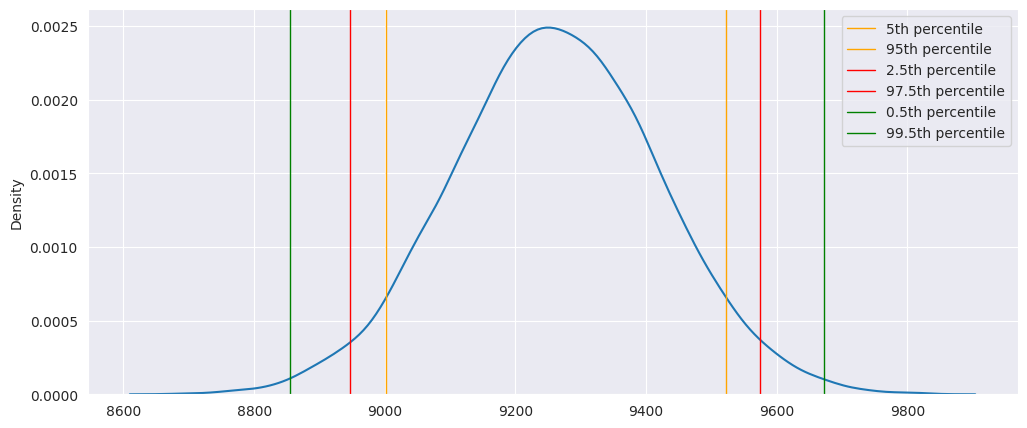

In [181]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(married_purchase_mean_1000)
plt.axvline(x=np.percentile(married_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(married_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

**Repeating Analysis for sample of sizes 2500 and 5000**

In [182]:
# Bootstraping means for sample of size 2500
married_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(married_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    married_purchase_mean_2500.append(bootstraped_mean)

# Bootstraping means for sample of size 5000
married_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(married_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    married_purchase_mean_5000.append(bootstraped_mean)

In [183]:
CI_married_90_2500=np.percentile(married_purchase_mean_2500,[5,95])
CI_married_95_2500=np.percentile(married_purchase_mean_2500,[2.5,97.5])
CI_married_99_2500=np.percentile(married_purchase_mean_2500,[0.5,99.5])
CI_married_90_5000=np.percentile(married_purchase_mean_5000,[5,95])
CI_married_95_5000=np.percentile(married_purchase_mean_5000,[2.5,97.5])
CI_married_99_5000=np.percentile(married_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_married_90_2500[0],2)} - {np.round(CI_married_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_married_99_2500[0],2)} - {np.round(CI_married_99_2500[1],2)}')
print(f'CI at 90% for sample of size 5000: {np.round(CI_married_90_5000[0],2)} - {np.round(CI_married_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_married_99_5000[0],2)} - {np.round(CI_married_99_5000[1],2)}')


CI at 90% for sample of size 2500: 9097.87 - 9427.19
CI at 95% for sample of size 2500: 9065.23 - 9461.74
CI at 99% for sample of size 2500: 9001.73 - 9525.43
CI at 90% for sample of size 5000: 9141.54 - 9378.0
CI at 95% for sample of size 5000: 9119.57 - 9399.93
CI at 99% for sample of size 5000: 9079.86 - 9448.0


**Visualising bootstraped means through histogram in order to check that it follows normal distribution**

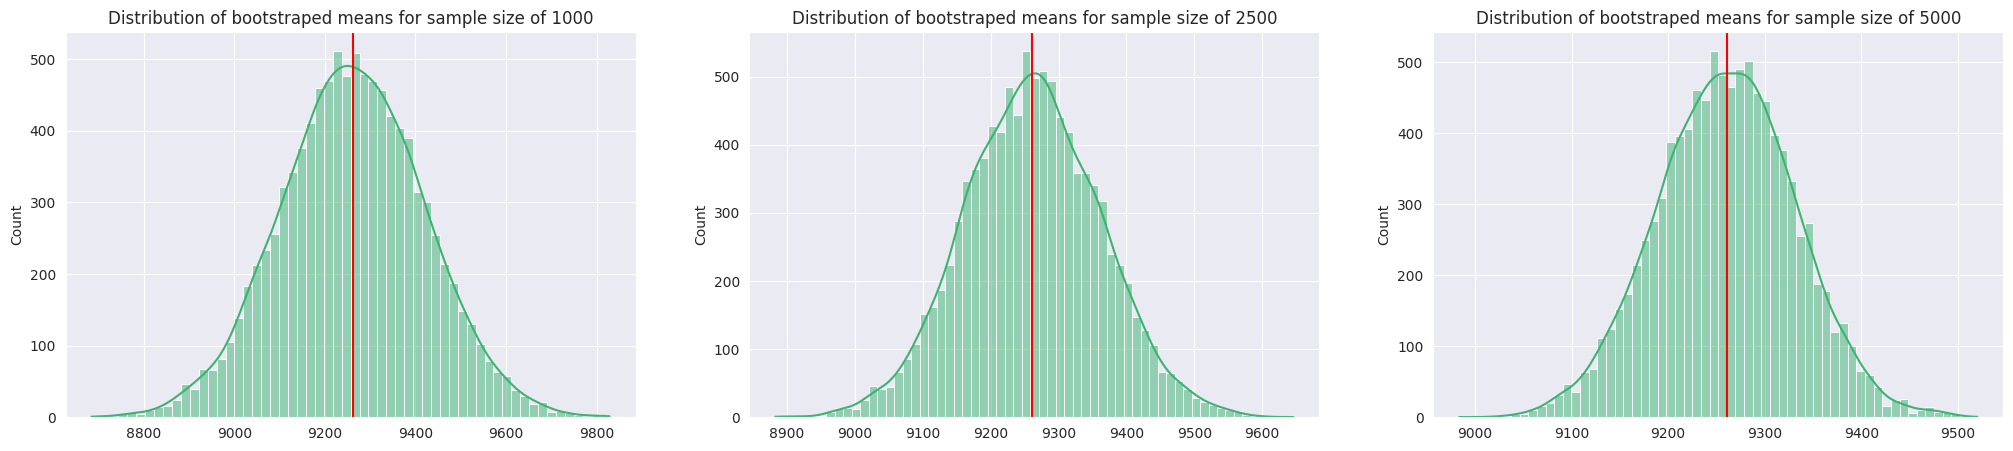

In [184]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(married_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(married_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(married_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(married_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

**Inference**:

1. In accordance with the Central Limit Theorem, the distribution of sample means tends to become normal, even when the population distribution does not exhibit normality. This phenomenon is clearly evident in this scenario, as the distribution of bootstrapped means conforms to a normal distribution, despite the population mean not adhering to such a distribution.
2. As the sample size increases, the distribution of sample means becomes closer to a normal distribution.

**Calculating the standard error for sample sizes of 1000, 2500, and 5000**

In [185]:
# Standard error using formulla --->(population standard deviation/sqrt(sample size))

SE_married_1000 = (married_df.std()/np.sqrt(1000))
SE_married_2500 = (married_df.std()/np.sqrt(2500))
SE_married_5000 = (married_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_married_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_married_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_married_5000,2)}')

Standard error for sample size of 1000: 158.65
Standard error for sample size of 2500: 100.34
Standard error for sample size of 5000: 70.95


**Visualising all analysis using a table**

In [186]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_married_1000,SE_married_2500,SE_married_5000],
            'CI_90':[f'{np.round(CI_married_90_1000[0],2)} - {np.round(CI_married_90_1000[1],2)}',
                     f'{np.round(CI_married_90_2500[0],2)} - {np.round(CI_married_90_2500[1],2)}',
                     f'{np.round(CI_married_90_5000[0],2)} - {np.round(CI_married_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}',
                     f'{np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}',
                     f'{np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_married_99_1000[0],2)} - {np.round(CI_married_99_1000[1],2)}',
                     f'{np.round(CI_married_99_2500[0],2)} - {np.round(CI_married_99_2500[1],2)}',
                     f'{np.round(CI_married_99_5000[0],2)} - {np.round(CI_married_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,158.648225,9001.93 - 9522.35,8947.11 - 9575.03,8854.26 - 9672.39
1,2500,100.337948,9097.87 - 9427.19,9065.23 - 9461.74,9001.73 - 9525.43
2,5000,70.949643,9141.54 - 9378.0,9119.57 - 9399.93,9079.86 - 9448.0


**Inference**:

1. As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.
2. The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.

### CLT and CI analysis for Unmarried Customers

**Creating a Samples of size 1000 and computing means through bootstraping**

In [187]:
unmarried_df=df.loc[df['Marital_Status']=='Unmarried']['Purchase']
unmarried_df.mean()

9265.907618921507

In [188]:
unmarried_purchase_mean_1000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_1000.append(bootstraped_mean)

In [189]:
CI_unmarried_90_1000=np.percentile(unmarried_purchase_mean_1000,[5,95])
CI_unmarried_95_1000=np.percentile(unmarried_purchase_mean_1000,[2.5,97.5])
CI_unmarried_99_1000=np.percentile(unmarried_purchase_mean_1000,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_unmarried_90_1000[0],2)} - {np.round(CI_unmarried_90_1000[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_unmarried_99_1000[0],2)} - {np.round(CI_unmarried_99_1000[1],2)}')

CI at 90% for sample of size 1000: 8998.68 - 9524.79
CI at 95% for sample of size 1000: 8947.99 - 9571.25
CI at 99% for sample of size 1000: 8853.47 - 9681.56


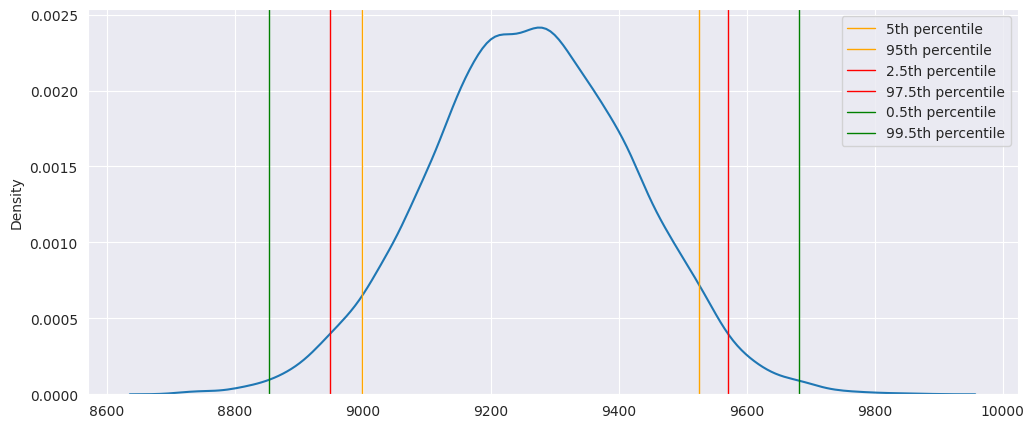

In [190]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(unmarried_purchase_mean_1000)
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(unmarried_purchase_mean_1000,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

**Repeating Analysis for sample of sizes 2500 and 5000**

In [191]:
unmarried_purchase_mean_2500=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=2500)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_2500.append(bootstraped_mean)

# Bootstraping means for sample of size 5000
unmarried_purchase_mean_5000=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(unmarried_df,size=5000)
    bootstraped_mean=np.mean(bootstraped_sample)
    unmarried_purchase_mean_5000.append(bootstraped_mean)

In [192]:
CI_unmarried_90_2500=np.percentile(unmarried_purchase_mean_2500,[5,95])
CI_unmarried_95_2500=np.percentile(unmarried_purchase_mean_2500,[2.5,97.5])
CI_unmarried_99_2500=np.percentile(unmarried_purchase_mean_2500,[0.5,99.5])
CI_unmarried_90_5000=np.percentile(unmarried_purchase_mean_5000,[5,95])
CI_unmarried_95_5000=np.percentile(unmarried_purchase_mean_5000,[2.5,97.5])
CI_unmarried_99_5000=np.percentile(unmarried_purchase_mean_5000,[0.5,99.5])
print(f'CI at 90% for sample of size 2500: {np.round(CI_unmarried_90_2500[0],2)} - {np.round(CI_unmarried_90_2500[1],2)}')
print(f'CI at 95% for sample of size 2500: {np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}')
print(f'CI at 99% for sample of size 2500: {np.round(CI_unmarried_99_2500[0],2)} - {np.round(CI_unmarried_99_2500[1],2)}')
print(f'CI at 90% for sample of size 5000: {np.round(CI_unmarried_90_5000[0],2)} - {np.round(CI_unmarried_90_5000[1],2)}')
print(f'CI at 95% for sample of size 5000: {np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}')
print(f'CI at 99% for sample of size 5000: {np.round(CI_unmarried_99_5000[0],2)} - {np.round(CI_unmarried_99_5000[1],2)}')

CI at 90% for sample of size 2500: 9099.54 - 9432.66
CI at 95% for sample of size 2500: 9069.5 - 9465.58
CI at 99% for sample of size 2500: 9014.52 - 9525.6
CI at 90% for sample of size 5000: 9149.1 - 9380.66
CI at 95% for sample of size 5000: 9128.85 - 9404.81
CI at 99% for sample of size 5000: 9086.68 - 9448.85


**Visualising bootstraped means through histogram in order to check that it follows normal distribution**

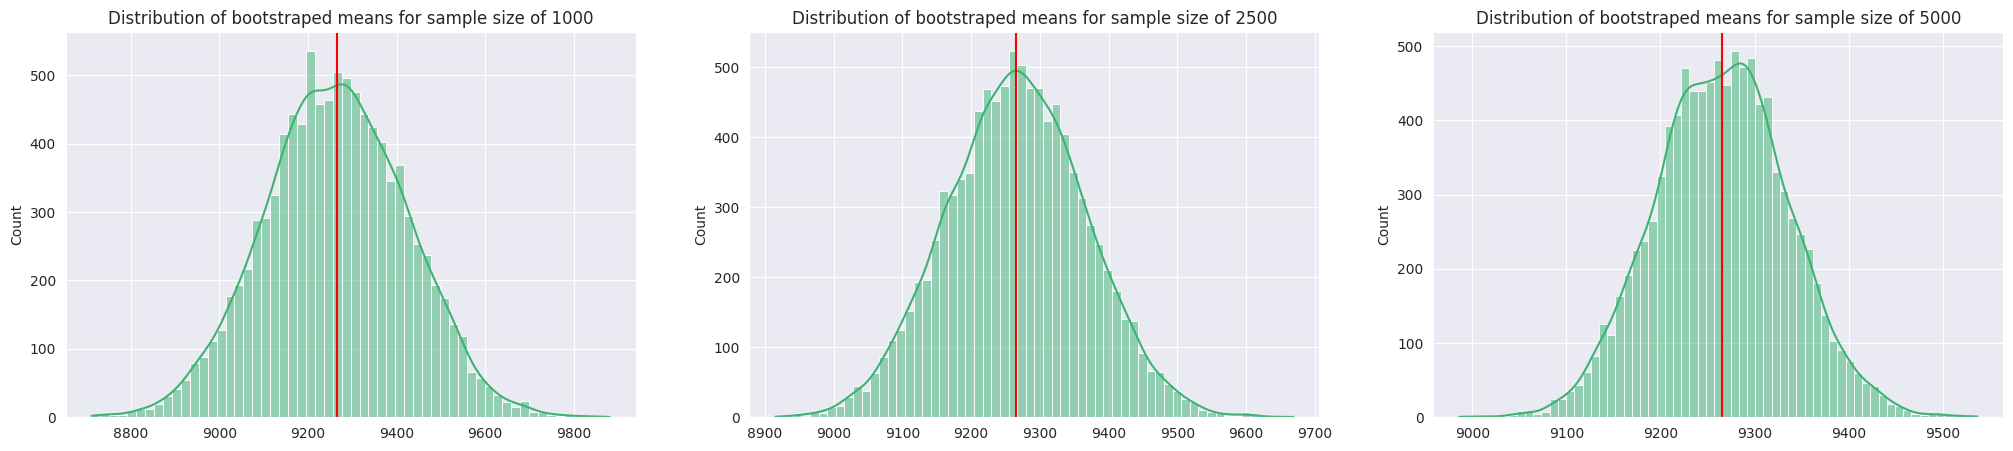

In [193]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
sns.histplot(unmarried_purchase_mean_1000,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 1000')

plt.subplot(1,3,2)
sns.histplot(unmarried_purchase_mean_2500,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 2500')

plt.subplot(1,3,3)
sns.histplot(unmarried_purchase_mean_5000,kde=True,color='mediumseagreen')
plt.axvline(unmarried_df.mean(),color='red',linestyle='-',linewidth=1.5)
plt.title('Distribution of bootstraped means for sample size of 5000')
plt.show()

**Inference**:
1. In accordance with the Central Limit Theorem, the distribution of sample means tends to become normal, even when the population distribution does not exhibit normality. This phenomenon is clearly evident in this scenario, as the distribution of bootstrapped means conforms to a normal distribution, despite the population mean not adhering to such a distribution.
2. As the sample size increases, the distribution of sample means becomes closer to a normal distribution

**Calculating the standard error for sample sizes of 1000, 2500, and 5000**

In [194]:
# Standard error using formulla --->(population standard deviation/sqrt(sample size))

SE_unmarried_1000 = (unmarried_df.std()/np.sqrt(1000))
SE_unmarried_2500 = (unmarried_df.std()/np.sqrt(2500))
SE_unmarried_5000 = (unmarried_df.std()/np.sqrt(5000))
print(f'Standard error for sample size of 1000: {np.round(SE_unmarried_1000,2)}')
print(f'Standard error for sample size of 2500: {np.round(SE_unmarried_2500,2)}')
print(f'Standard error for sample size of 5000: {np.round(SE_unmarried_5000,2)}')

Standard error for sample size of 1000: 158.98
Standard error for sample size of 2500: 100.55
Standard error for sample size of 5000: 71.1


**Visualising all analysis using a table**

In [195]:
pd.DataFrame({'Sample Size':[1000,2500,5000],
             'Standard Error':[SE_unmarried_1000,SE_unmarried_2500,SE_unmarried_5000],
            'CI_90':[f'{np.round(CI_unmarried_90_1000[0],2)} - {np.round(CI_unmarried_90_1000[1],2)}',
                     f'{np.round(CI_unmarried_90_2500[0],2)} - {np.round(CI_unmarried_90_2500[1],2)}',
                     f'{np.round(CI_unmarried_90_5000[0],2)} - {np.round(CI_unmarried_90_5000[1],2)}'],
             'CI_95':[f'{np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}',
                     f'{np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}',
                     f'{np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}'],
             'CI_99':[f'{np.round(CI_unmarried_99_1000[0],2)} - {np.round(CI_unmarried_99_1000[1],2)}',
                     f'{np.round(CI_unmarried_99_2500[0],2)} - {np.round(CI_unmarried_99_2500[1],2)}',
                     f'{np.round(CI_unmarried_99_5000[0],2)} - {np.round(CI_unmarried_99_5000[1],2)}']})

,Sample Size,Standard Error,CI_90,CI_95,CI_99
0,1000,158.978698,8998.68 - 9524.79,8947.99 - 9571.25,8853.47 - 9681.56
1,2500,100.546957,9099.54 - 9432.66,9069.5 - 9465.58,9014.52 - 9525.6
2,5000,71.097435,9149.1 - 9380.66,9128.85 - 9404.81,9086.68 - 9448.85


**Inference**:

1. As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.
2. The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.

### Conclusion

**Comparing confidence interval for married and unmarried customers at 95% and sample size is 1000**

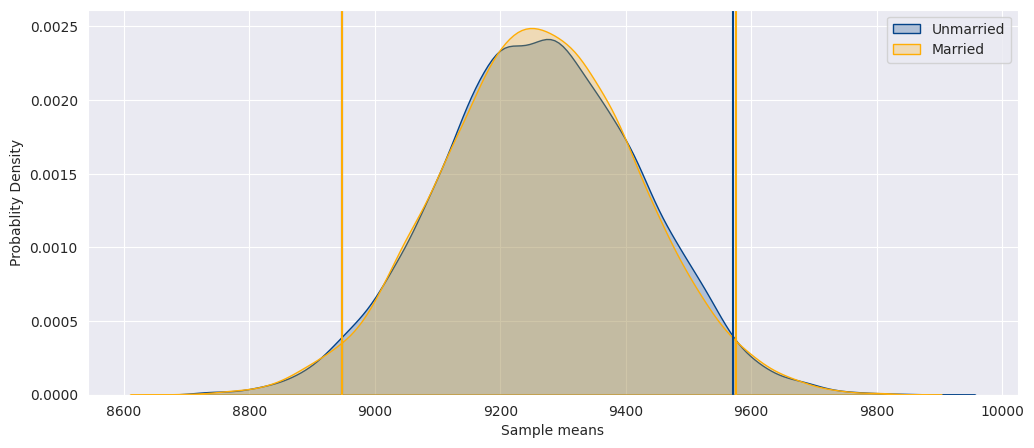

In [196]:
plt.figure(figsize=(12,5))
sns.kdeplot(unmarried_purchase_mean_1000,color='#044389',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_1000,color='#FFAD05',fill=True,label='Married')
plt.axvline(np.percentile(unmarried_purchase_mean_1000,[2.5]),0,1,color='#044389')
plt.axvline(np.percentile(unmarried_purchase_mean_1000,[97.5]),0,1,color='#044389')
plt.axvline(np.percentile(married_purchase_mean_1000,[2.5]),0,1,color='#FFAD05')
plt.axvline(np.percentile(married_purchase_mean_1000,[97.5]),0,1,color='#FFAD05')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

**Comparing confidence interval for married and unmarried customers at 95% and sample size is 2500**

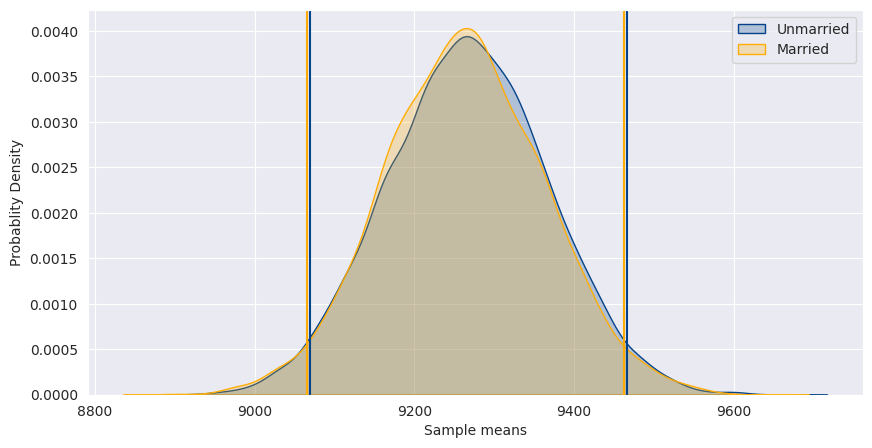

In [197]:
plt.figure(figsize=(10,5))
sns.kdeplot(unmarried_purchase_mean_2500,color='#044389',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_2500,color='#FFAD05',fill=True,label='Married')
plt.axvline(np.percentile(unmarried_purchase_mean_2500,[2.5]),0,1,color='#044389')
plt.axvline(np.percentile(unmarried_purchase_mean_2500,[97.5]),0,1,color='#044389')
plt.axvline(np.percentile(married_purchase_mean_2500,[2.5]),0,1,color='#FFAD05')
plt.axvline(np.percentile(married_purchase_mean_2500,[97.5]),0,1,color='#FFAD05')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

**Comparing confidence interval for married and unmarried customers at 95% and sample size is 5000**

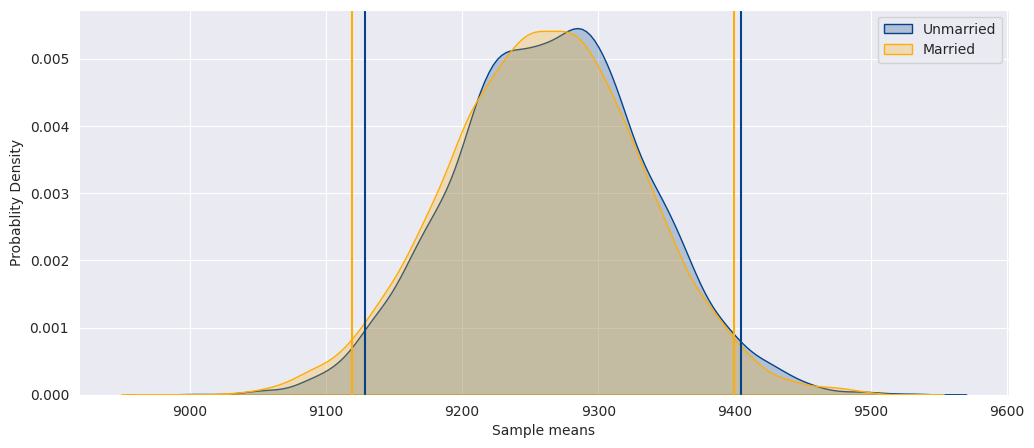

In [198]:
plt.figure(figsize=(12,5))
sns.kdeplot(unmarried_purchase_mean_5000,color='#044389',fill=True,label='Unmarried')
sns.kdeplot(married_purchase_mean_5000,color='#FFAD05',fill=True,label='Married')
plt.axvline(np.percentile(unmarried_purchase_mean_5000,[2.5]),0,1,color='#044389')
plt.axvline(np.percentile(unmarried_purchase_mean_5000,[97.5]),0,1,color='#044389')
plt.axvline(np.percentile(married_purchase_mean_5000,[2.5]),0,1,color='#FFAD05')
plt.axvline(np.percentile(married_purchase_mean_5000,[97.5]),0,1,color='#FFAD05')
plt.xlabel('Sample means')
plt.ylabel('Probablity Density')
plt.legend()
plt.show()

**Inference**:

The confidence intervals for married and unmarried customers overlap, suggesting that both male and female customers spend a similar amount per transaction. This means that the spending behavior of married and unmarried customers is alike.

### Answers to the Questions

**Q1: Are confidence intervals of average married and unmarried spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)**

1. Yes,confidence intervals of average married and unmarried spending overlapping.
2. The overlapping confidence intervals of average spending for married and unmarried customers indicate that both male and female customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.
3. Instead of allocating resources and time to differentiate between "Married" and "Unmarried" subcategories, Walmart could enhance efficiency by treating both categories as unified. This approach is likely to yield more effective results.


**Q2: Confidence intervals and distribution of the mean of the expenses by female and male customers**

In [199]:
pd.DataFrame({'Sample Size':[1000,2500,5000],

             'CI_95_married':[f'{np.round(CI_married_95_1000[0],2)} - {np.round(CI_married_95_1000[1],2)}',
                     f'{np.round(CI_married_95_2500[0],2)} - {np.round(CI_married_95_2500[1],2)}',
                     f'{np.round(CI_married_95_5000[0],2)} - {np.round(CI_married_95_5000[1],2)}'],
             'CI_95_unmarried':[f'{np.round(CI_unmarried_95_1000[0],2)} - {np.round(CI_unmarried_95_1000[1],2)}',
                     f'{np.round(CI_unmarried_95_2500[0],2)} - {np.round(CI_unmarried_95_2500[1],2)}',
                     f'{np.round(CI_unmarried_95_5000[0],2)} - {np.round(CI_unmarried_95_5000[1],2)}']})

,Sample Size,CI_95_married,CI_95_unmarried
0,1000,8947.11 - 9575.03,8947.99 - 9571.25
1,2500,9065.23 - 9461.74,9069.5 - 9465.58
2,5000,9119.57 - 9399.93,9128.85 - 9404.81


## CI analysis for age-group

### CI analysis for 0-17 age-group

**Creating a Samples of size 1000 and computing means through bootstraping**

In [200]:
youth_df=df.loc[df['Age']=='0-17']['Purchase']
youth_df.mean()

8933.464640444974

In [201]:
youth_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(youth_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    youth_purchase_mean.append(bootstraped_mean)

**Calculating CI at 90%,95% and 99% for sample of size 1000**

In [202]:
CI_youth_90=np.percentile(youth_purchase_mean,[5,95])
CI_youth_95=np.percentile(youth_purchase_mean,[2.5,97.5])
CI_youth_99=np.percentile(youth_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_youth_90[0],2)} - {np.round(CI_youth_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_youth_95[0],2)} - {np.round(CI_youth_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_youth_99[0],2)} - {np.round(CI_youth_99[1],2)}')

CI at 90% for sample of size 1000: 8672.07 - 9197.67
CI at 95% for sample of size 1000: 8623.5 - 9244.26
CI at 99% for sample of size 1000: 8519.49 - 9349.26


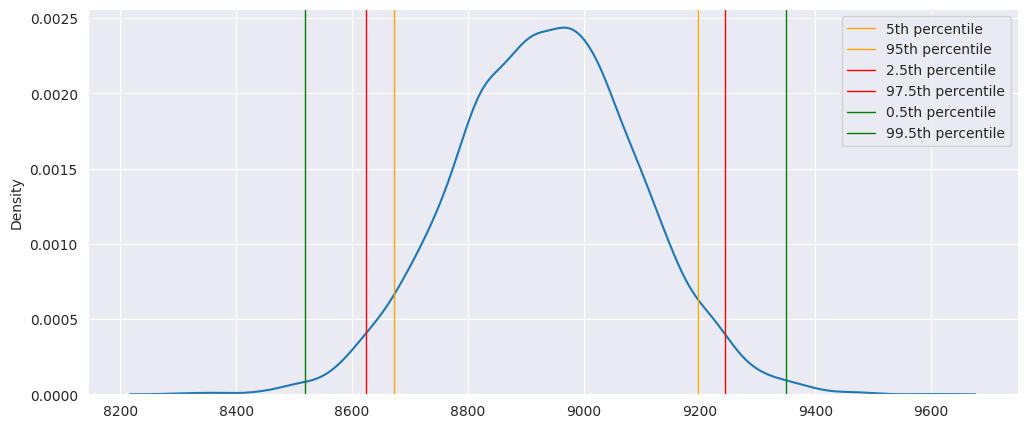

In [203]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(youth_purchase_mean)
plt.axvline(x=np.percentile(youth_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(youth_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 18-25 age-group

**Creating a Samples of size 1000 and computing means through bootstraping**

In [204]:
young_df=df.loc[df['Age']=='18-25']['Purchase']
young_df.mean()

9169.663606261289

In [205]:
young_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(young_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    young_purchase_mean.append(bootstraped_mean)

**Calculating CI at 90%,95% and 99% for sample of size 1000**

In [206]:
CI_young_90=np.percentile(young_purchase_mean,[5,95])
CI_young_95=np.percentile(young_purchase_mean,[2.5,97.5])
CI_young_99=np.percentile(young_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_young_90[0],2)} - {np.round(CI_young_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_young_95[0],2)} - {np.round(CI_young_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_young_99[0],2)} - {np.round(CI_young_99[1],2)}')

CI at 90% for sample of size 1000: 8912.67 - 9431.21
CI at 95% for sample of size 1000: 8858.76 - 9479.53
CI at 99% for sample of size 1000: 8762.22 - 9590.02


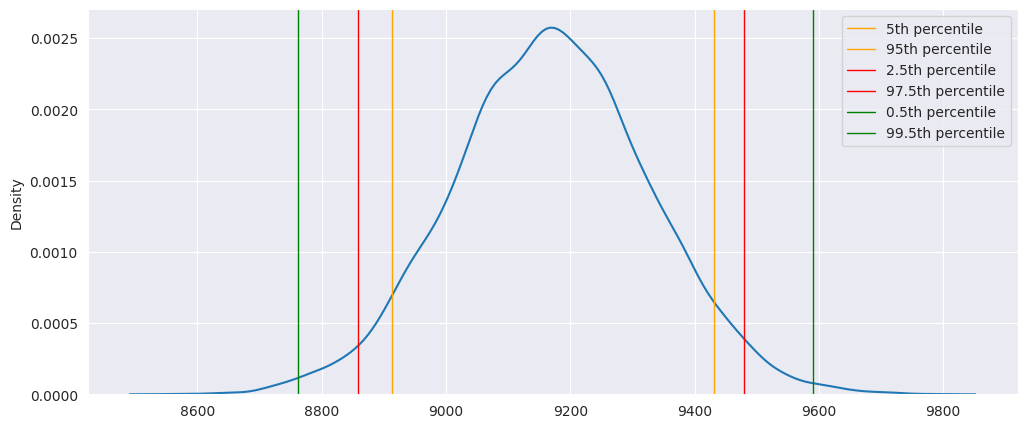

In [207]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(young_purchase_mean)
plt.axvline(x=np.percentile(young_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(young_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 26-35 age-group

**Creating a Samples of size 1000 and computing means through bootstraping**

In [208]:
adult_df=df.loc[df['Age']=='26-35']['Purchase']
adult_df.mean()

9252.690632869888

In [209]:
adult_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(adult_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    adult_purchase_mean.append(bootstraped_mean)

**Calculating CI at 90%,95% and 99% for samples of size 1000**

In [210]:
CI_adult_90=np.percentile(adult_purchase_mean,[5,95])
CI_adult_95=np.percentile(adult_purchase_mean,[2.5,97.5])
CI_adult_99=np.percentile(adult_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_adult_90[0],2)} - {np.round(CI_adult_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_adult_95[0],2)} - {np.round(CI_adult_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_adult_99[0],2)} - {np.round(CI_adult_99[1],2)}')

CI at 90% for sample of size 1000: 8988.09 - 9515.99
CI at 95% for sample of size 1000: 8939.28 - 9564.6
CI at 99% for sample of size 1000: 8832.6 - 9668.01


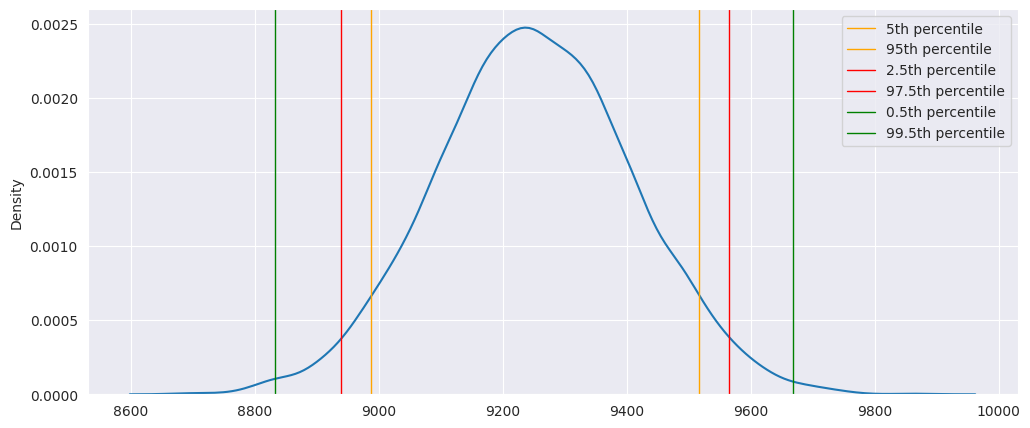

In [211]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(adult_purchase_mean)
plt.axvline(x=np.percentile(adult_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(adult_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 36-45 age-group

**Creating a Samples of size 1000 and computing means through bootstraping**

In [212]:
midage_df=df.loc[df['Age']=='36-45']['Purchase']
midage_df.mean()

9331.350694917874

In [213]:
midage_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(midage_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    midage_purchase_mean.append(bootstraped_mean)


**Calculating CI at 90%,95% and 99% for samples of size 1000**


In [214]:
CI_midage_90=np.percentile(midage_purchase_mean,[5,95])
CI_midage_95=np.percentile(midage_purchase_mean,[2.5,97.5])
CI_midage_99=np.percentile(midage_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_midage_90[0],2)} - {np.round(CI_midage_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_midage_95[0],2)} - {np.round(CI_midage_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_midage_99[0],2)} - {np.round(CI_midage_99[1],2)}')

CI at 90% for sample of size 1000: 9070.85 - 9593.45
CI at 95% for sample of size 1000: 9023.17 - 9644.94
CI at 99% for sample of size 1000: 8915.98 - 9752.21


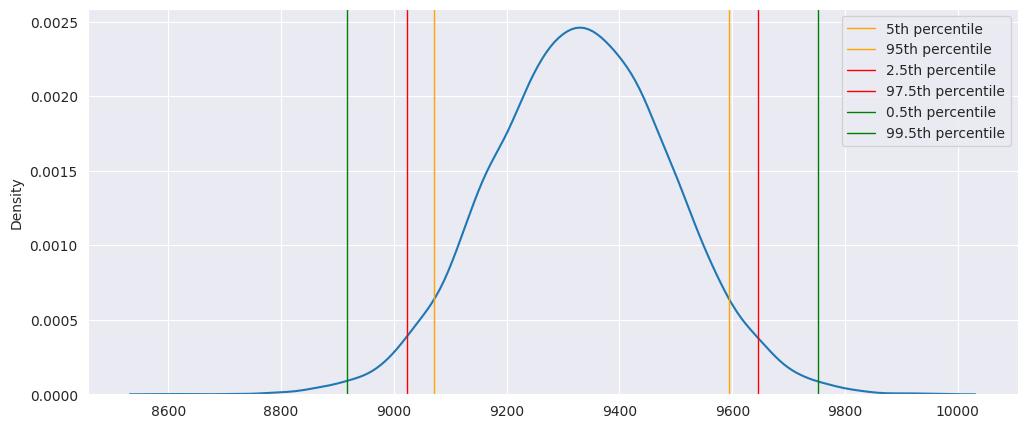

In [215]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(midage_purchase_mean)
plt.axvline(x=np.percentile(midage_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(midage_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 46-50 Age-group

**Creating a Samples of size 1000 and computing means through bootstraping**

In [216]:
midlife_df=df.loc[df['Age']=='46-50']['Purchase']
midlife_df.mean()

9208.625697468327

In [217]:
midlife_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(midlife_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    midlife_purchase_mean.append(bootstraped_mean)

**Calculating CI at 90%,95% and 99% for samples of size 1000**

In [218]:
CI_midlife_90=np.percentile(midlife_purchase_mean,[5,95])
CI_midlife_95=np.percentile(midlife_purchase_mean,[2.5,97.5])
CI_midlife_99=np.percentile(midlife_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_midlife_90[0],2)} - {np.round(CI_midlife_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_midlife_95[0],2)} - {np.round(CI_midlife_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_midlife_99[0],2)} - {np.round(CI_midlife_99[1],2)}')

CI at 90% for sample of size 1000: 8952.75 - 9463.21
CI at 95% for sample of size 1000: 8905.64 - 9512.62
CI at 99% for sample of size 1000: 8822.11 - 9606.27


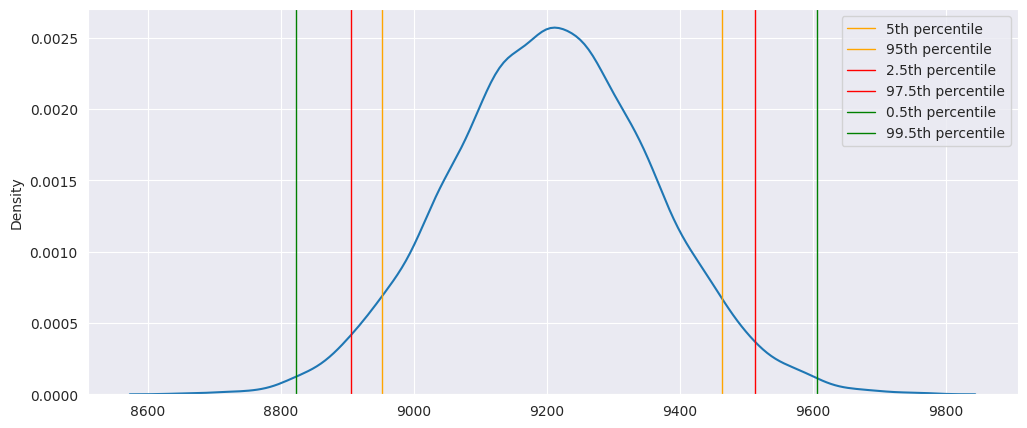

In [219]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(midlife_purchase_mean)
plt.axvline(x=np.percentile(midlife_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(midlife_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 51-55 age-group

**Creating a Samples of size 1000 and computing means through bootstraping**

In [220]:
old_df=df.loc[df['Age']=='51-55']['Purchase']
old_df.mean()

9534.808030960236

In [221]:
old_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(old_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    old_purchase_mean.append(bootstraped_mean)

**Calculating CI at 90%,95% and 99% for samples of size 1000**

In [222]:
CI_old_90=np.percentile(old_purchase_mean,[5,95])
CI_old_95=np.percentile(old_purchase_mean,[2.5,97.5])
CI_old_99=np.percentile(old_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_old_90[0],2)} - {np.round(CI_old_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_old_95[0],2)} - {np.round(CI_old_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_old_99[0],2)} - {np.round(CI_old_99[1],2)}')

CI at 90% for sample of size 1000: 9267.9 - 9797.08
CI at 95% for sample of size 1000: 9217.15 - 9850.29
CI at 99% for sample of size 1000: 9122.21 - 9945.85


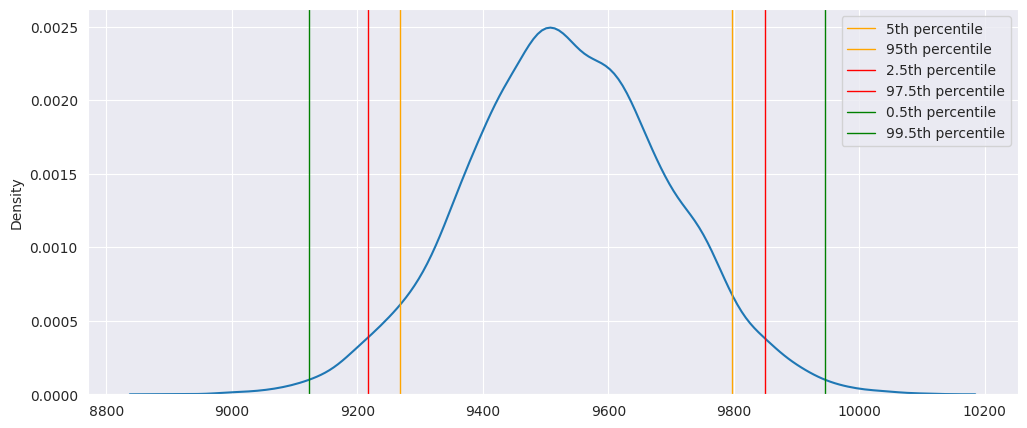

In [223]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(old_purchase_mean)
plt.axvline(x=np.percentile(old_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(old_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### CI analysis for 55+ age-group

**Creating a Samples of size 1000 and computing means through bootstraping**

In [224]:
senior_df=df.loc[df['Age']=='55+']['Purchase']
senior_df.mean()

9336.280459449405

In [225]:
senior_purchase_mean=[]
for i in range(10000):
    bootstraped_sample=np.random.choice(senior_df,size=1000)
    bootstraped_mean=np.mean(bootstraped_sample)
    senior_purchase_mean.append(bootstraped_mean)

**Calculating CI at 90%,95% and 99% for samples of size 1000**

In [226]:
CI_senior_90=np.percentile(senior_purchase_mean,[5,95])
CI_senior_95=np.percentile(senior_purchase_mean,[2.5,97.5])
CI_senior_99=np.percentile(senior_purchase_mean,[0.5,99.5])
print(f'CI at 90% for sample of size 1000: {np.round(CI_senior_90[0],2)} - {np.round(CI_senior_90[1],2)}')
print(f'CI at 95% for sample of size 1000: {np.round(CI_senior_95[0],2)} - {np.round(CI_senior_95[1],2)}')
print(f'CI at 99% for sample of size 1000: {np.round(CI_senior_99[0],2)} - {np.round(CI_senior_99[1],2)}')

CI at 90% for sample of size 1000: 9075.44 - 9596.0
CI at 95% for sample of size 1000: 9020.9 - 9635.88
CI at 99% for sample of size 1000: 8927.26 - 9733.12


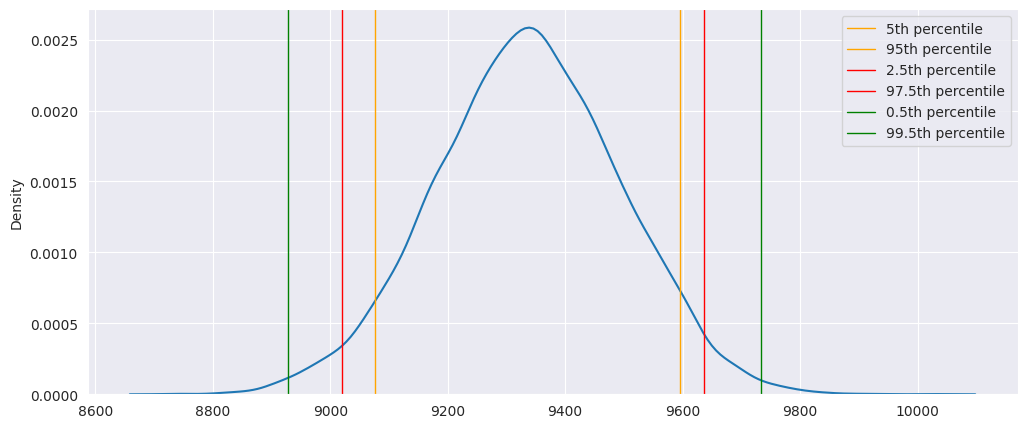

In [227]:
# visulaizing CI for sample size of 1000
plt.figure(figsize=(12,5))
sns.kdeplot(senior_purchase_mean)
plt.axvline(x=np.percentile(senior_purchase_mean,[5]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[95]),ymin=0,ymax=1,color='orange',linewidth=1.0,label='95th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[2.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='2.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[97.5]),ymin=0,ymax=1,color='red',linewidth=1.0,label='97.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[0.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='0.5th percentile')
plt.axvline(x=np.percentile(senior_purchase_mean,[99.5]),ymin=0,ymax=1,color='green',linewidth=1.0,label='99.5th percentile')
plt.legend()
plt.show()

### Conclusion

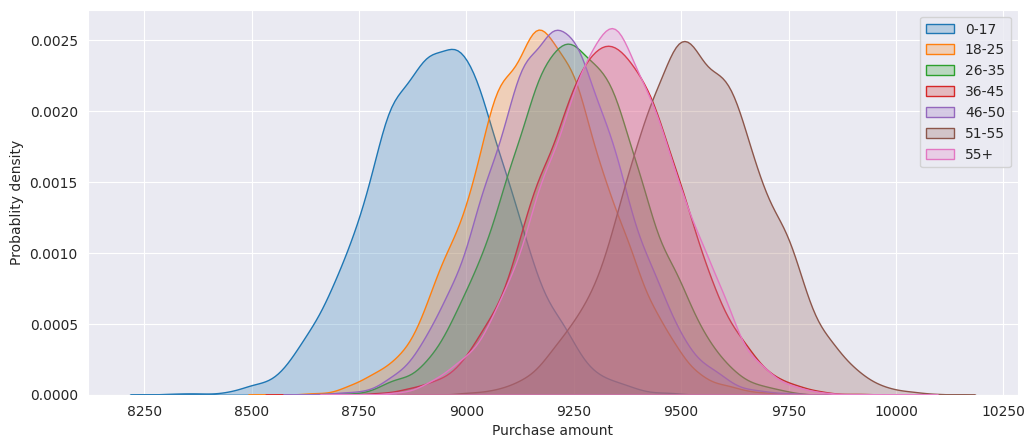

In [228]:
sample_means=[youth_purchase_mean,young_purchase_mean,adult_purchase_mean,midage_purchase_mean,midlife_purchase_mean,old_purchase_mean,senior_purchase_mean]
labels=['0-17','18-25','26-35','36-45','46-50','51-55','55+']
plt.figure(figsize=(12,5))
for i in range(len(labels)):
    sns.kdeplot(sample_means[i],fill=True,label=labels[i])
plt.xlabel('Purchase amount')
plt.ylabel('Probablity density')
plt.legend()
plt.show()

**Inference:**
The majority of age groups' purchasing behaviors exhibit overlapping patterns, with the exception of the (0-17) and (51-55) age categories.

# Insights

1. At Walmart, 75.3% of transactions are attributed to male customers, while 24.7% of transactions are attributed to female customers.
2.With 75.3% of transactions being initiated by male customers and 24.7% by female customers, the confidence interval for male purchases consistently exhibits both a higher upper bound and a wider spread in comparison to the confidence interval for female purchases. This statistical trend strongly implies that male customers tend to have a higher average transaction spending compared to their female counterparts.
3. Inter Quartile Range for male customers :5863.0-12454.0
4. Median purchases for male customers: 8098.0
5. Inter Quartile Range for female customer:5433.0-11400.0
6. Median purchases for female customers: 7914.0
7. CI for male customers at 95% for sample size of 1000: 9122.77 - 9750.98
8. CI for female customers at 95% for sample size of 1000: 8437.86 - 9029.25
9. Out of the total transactions, 59% are carried out by unmarried customers, while the remaining 41% are attributed to married customers.
10. The confidence intervals for married and unmarried customers overlap, suggesting that both male and female customers spend a similar amount per transaction. This means that the spending behavior of married and unmarried customers is alike.
11. The spending behavior of both married and unmarried customers is consistent, as they both spend nearly the same amount per transaction. This is notably evident from the boxplot analysis, where the interquartile range and median purchases for both groups remain identical.
12. CI for married customers at 95% for sample size of 1000: 8956.45 - 9582.07
13. CI for unmarried customers at 95% for sample size of 1000: 8951.62 - 9572.98
14. Approximately 86.31% of transactions are attributed to the age group 26-50, while those aged above 50 account for 10.91%. The youngest group (0-17 years) constitutes 2.75% of the total transactions.
15. The majority of age groups' purchasing behaviors exhibit overlapping patterns, with the exception of the (0-17) and (51-55) age categories.
16. Purchase distribution of customers exhibits positive skewness, with a pronounced tail extending towards the higher values on the right side.
17. Among Walmart's customers, a notable 27.4% exhibit a preference for purchasing items within product category 5. On the other hand, product category 9 experiences the least popularity, with only a minimal 0.07% of customers expressing a preference for it.
18. The majority of customers fall under Occupation category 4.
19. Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.
20. The majority of customers reside in a single city for a duration of one year.
21. Within Walmart, product categories 13, 19, and 20 record the lowest spending per transaction among customers.
22. Among Walmart customers, product categories 6, 7, and 15 stand out as the most favored, evidenced by their higher spending per transaction.
23. Customers residing in a 'C' city category demonstrate higher spending per transaction compared to customers in other city categories.
24. Female customers predominantly favor product category 5 for their purchases, while male customers show a preference for product category 1 in their shopping choices.
25. Both unmarried and married customers at Walmart exhibit a shared preference for product category 5 when making their shopping choices.

# Recommendations

**Actionable Insight:   With 75.3% of transactions being initiated by male customers and 24.7% by female customers, the confidence interval for male purchases consistently exhibits both a higher upper bound and a wider spread in comparison to the confidence interval for female purchases. This statistical trend strongly implies that male customers tend to have a higher average transaction spending compared to their female counterparts.**

**Recommendations**:

1. For Black Friday sales, make sure the store provides a wide selection of products that align with the preferences and requirements of female customers. This might encompass a diverse range, spanning from clothing and beauty products to household essentials and beyond.
2. Actively seek feedback from female customers to understand their preferences, concerns, and suggestions. Use this feedback to make improvements and adjustments that cater to their needs.
3. For Black Friday sales, introduce loyalty programs tailored to female customers, featuring exclusive perks like discounts, early access to sales, and unique rewards. This approach can enhance engagement and attract female shoppers.
4. Enhance the online shopping experience for female customers. Ensure that the website is user-friendly, offers detailed product information, and provides convenient options for delivery and returns.
5. Collaborate with brands or influencers that resonate with female customers. This can help expand Walmart's reach and attract new female customers.


**Actionable Insight: Confidence intervals of average married and unmarried spending overlapping.**

**Recommendations:**
1. The overlapping confidence intervals of average spending for married and unmarried customers indicate that both male and female customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.
2. Instead of allocating resources and time to differentiate between "Married" and "Unmarried" subcategories, Walmart could enhance efficiency by treating both categories as unified. This approach is likely to yield more effective results.




**Actionable Insight: Approximately 86.31% of transactions are attributed to the age group 26-50, while those aged above 50 account for 10.91%. The youngest group (0-17 years) constitutes 2.75% of the total transactions..**

**Recommendations:**
1. Designate safe and fun play areas within the store where children can engage in age-appropriate activities. This can provide parents with a convenient shopping experience while keeping kids entertained.
2. Create dedicated zones with comfortable seating and Wi-Fi for teenagers. This can become a place where they can socialize, study, or relax while their parents shop.
3. Stock a wide range of products that appeal to kids and teenagers, including toys, clothes, books, electronics, and school supplies. Ensure that the products are both engaging and age-appropriate.
4. Offer educational toys, craft kits, and learning materials that promote creativity and skill development among children.
5. Introduce special discounts and offers exclusively for the 0-17 age group, encouraging both children and parents to choose Walmart for their shopping needs.